<a href="https://colab.research.google.com/github/substobeme/Clustering-for-Weather-Pattern-and-Forecast-Similarity-on-Bangalore-Meteorological-Data/blob/main/projectML_Term1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML _final_project/Bangalore_(till 2024).csv')
df

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,...,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,0,2010-01-01 00:00:00+00:00,16.872002,98.425760,16.622002,17.978365,0.0,0.0,0,0,...,910.14270,87.299995,97,0,0,8.311245,13.004921,94.96966,94.763560,13.679999
1,1,2010-01-01 01:00:00+00:00,16.622002,98.422745,16.372002,17.629425,0.0,0.0,0,0,...,910.77800,90.000000,100,0,0,8.280000,12.605142,90.00000,88.363464,13.320000
2,2,2010-01-01 02:00:00+00:00,16.972000,96.568040,16.422000,17.989653,0.0,0.0,0,0,...,911.88293,89.100000,99,0,0,8.350138,13.722565,82.56869,85.486100,15.480000
3,3,2010-01-01 03:00:00+00:00,18.972000,83.544785,16.122002,19.650670,0.0,0.0,0,0,...,913.26500,52.199997,58,0,0,9.826088,12.646200,81.57312,85.101000,20.160000
4,4,2010-01-01 04:00:00+00:00,21.272001,67.536240,15.022000,21.531075,0.0,0.0,0,0,...,914.37750,0.900000,1,0,0,9.726665,13.339445,87.87895,86.906006,26.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,123931,2024-02-20 19:00:00+00:00,22.196000,65.590680,15.446000,22.125502,0.0,0.0,0,0,...,913.14680,23.400002,0,39,0,13.104198,24.993437,127.18479,131.496370,25.560000
123932,123932,2024-02-20 20:00:00+00:00,21.746000,71.633500,16.396000,22.293646,0.0,0.0,0,0,...,912.82150,19.500000,0,27,11,11.480557,22.406927,131.18582,136.301880,21.960000
123933,123933,2024-02-20 21:00:00+00:00,21.096000,77.192530,16.946000,21.693005,0.0,0.0,0,0,...,912.34100,43.800003,0,73,0,12.722830,23.277834,115.11481,121.723560,21.240000
123934,123934,2024-02-20 22:00:00+00:00,20.596000,80.873620,17.196000,21.372244,0.0,0.0,0,0,...,911.90845,1.200000,0,2,0,12.229406,22.657131,132.61403,134.356340,21.240000


In [ ]:
import numpy as np

In [ ]:
df.columns

Index(['Unnamed: 0', 'date', 'temperature_2m', 'relative_humidity_2m',
       'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain',
       'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['date'] = pd.to_datetime(df['date'])

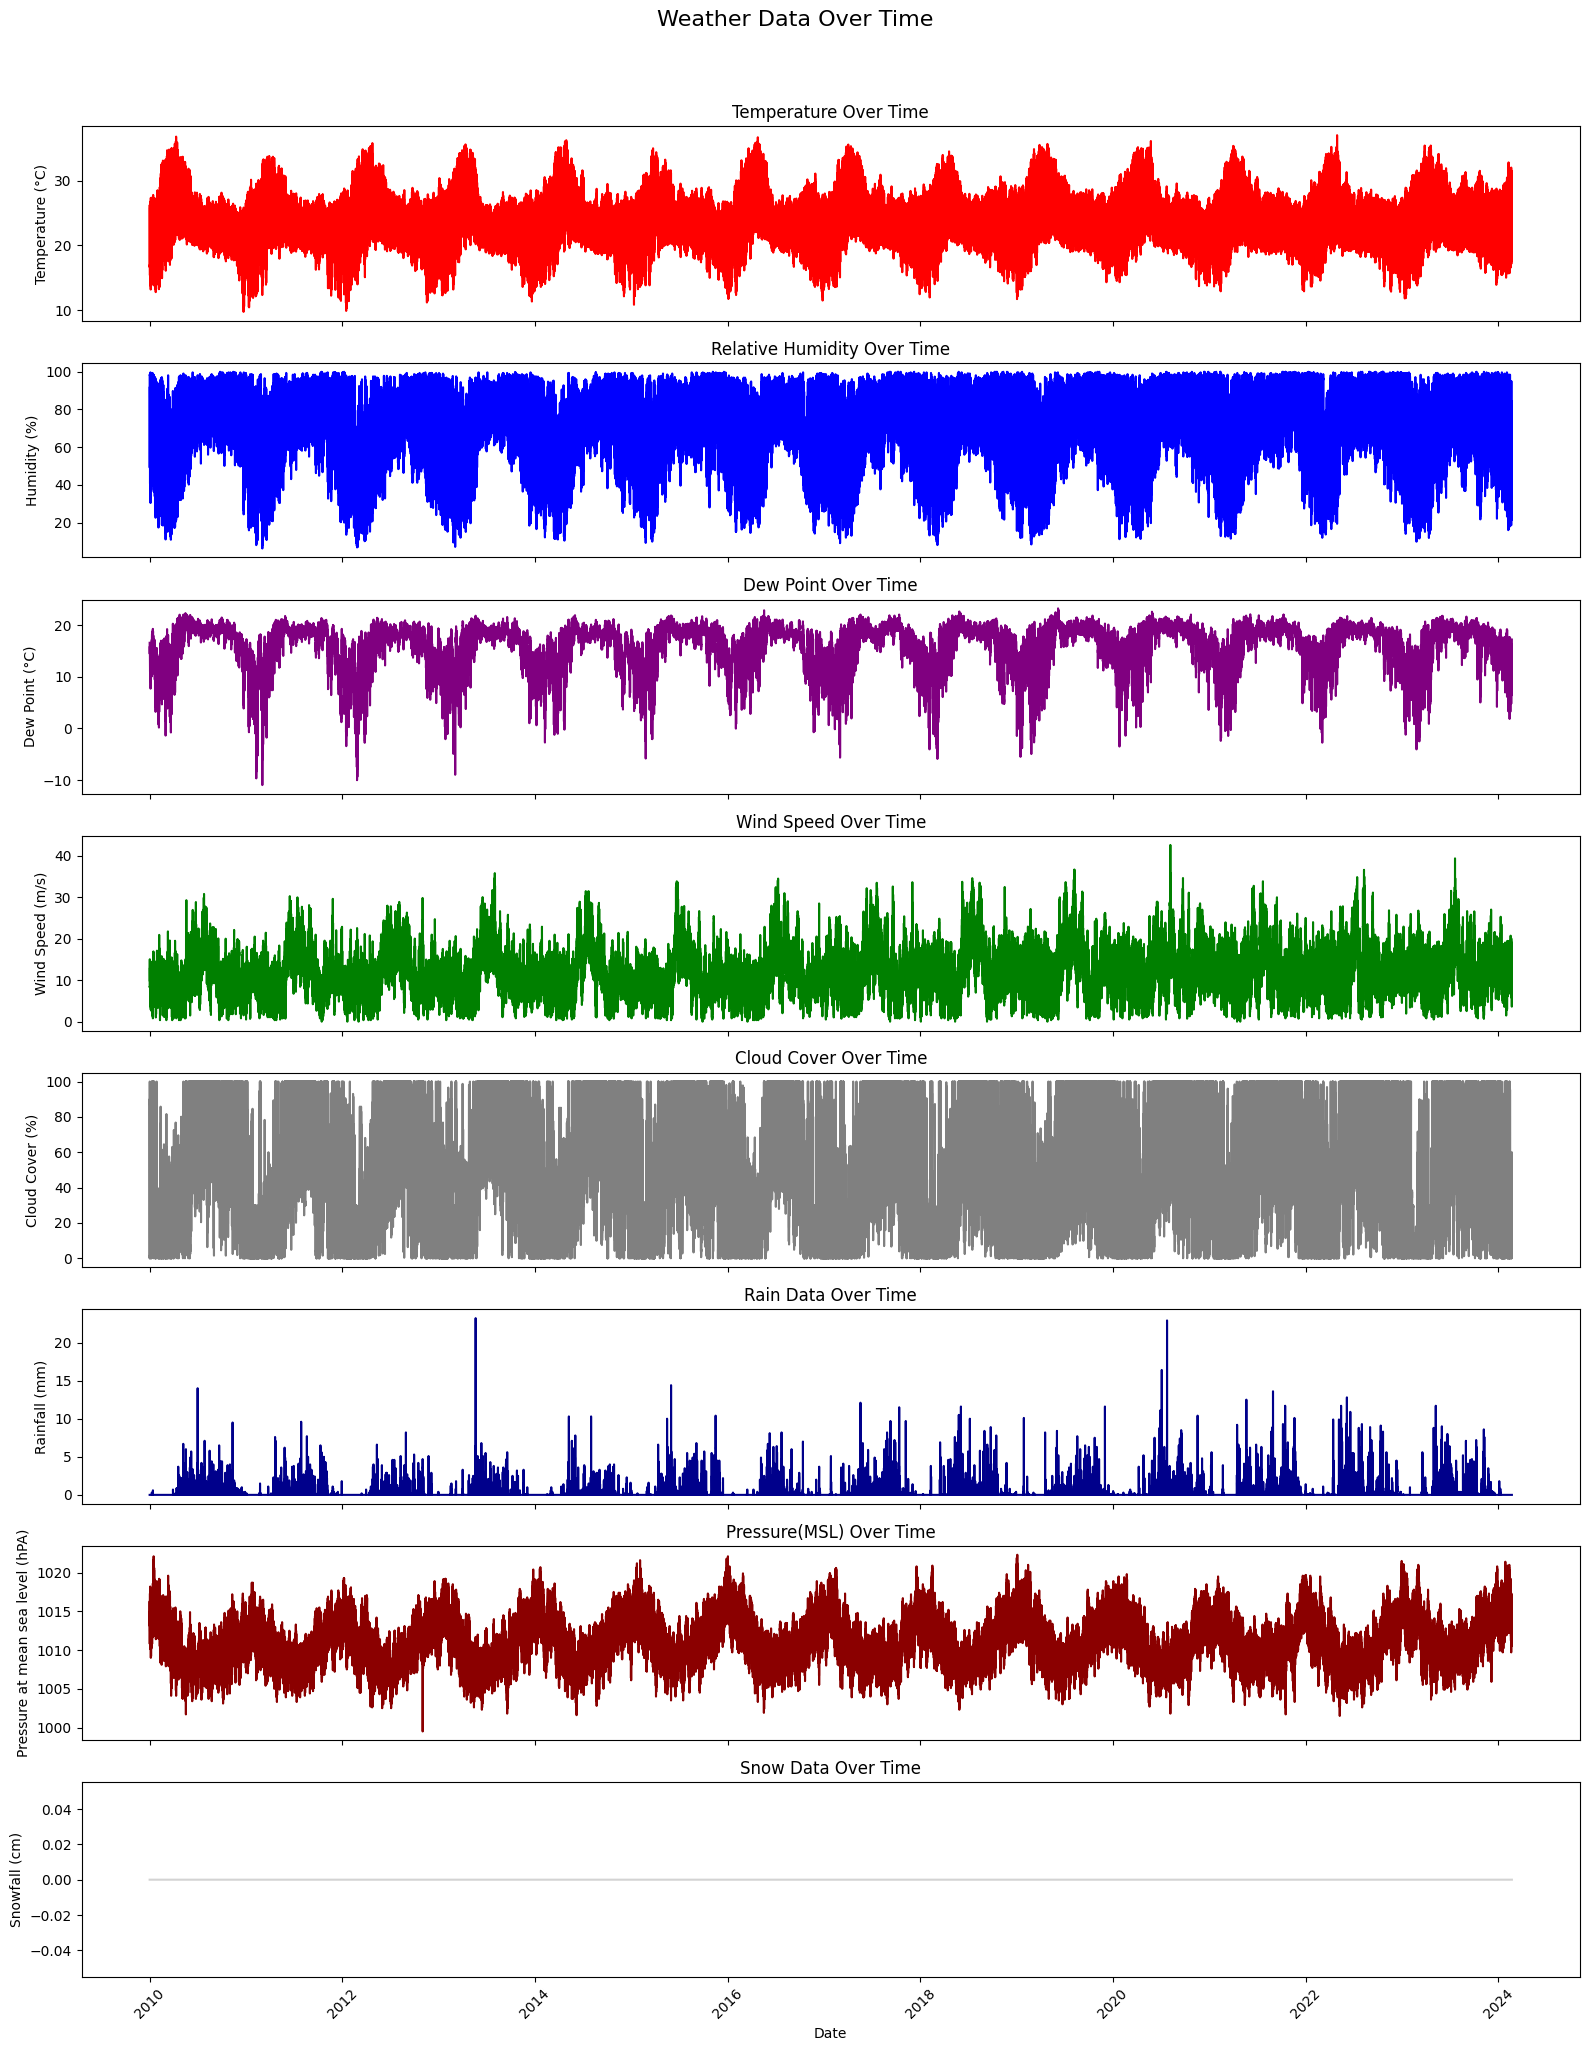

In [ ]:
fig, pos = plt.subplots(8, 1, figsize=(16, 22), sharex=True)
fig.suptitle('Weather Data Over Time', fontsize=16)

pos[0].plot(df['date'], df['temperature_2m'], color='red')
pos[0].set_ylabel('Temperature (°C)')
pos[0].set_title('Temperature Over Time')

pos[1].plot(df['date'], df['relative_humidity_2m'], color='blue')
pos[1].set_ylabel('Humidity (%)')
pos[1].set_title('Relative Humidity Over Time')

pos[2].plot(df['date'], df['dew_point_2m'], color='purple')
pos[2].set_ylabel('Dew Point (°C)')
pos[2].set_title('Dew Point Over Time')

pos[3].plot(df['date'], df['wind_speed_10m'], color='green')
pos[3].set_ylabel('Wind Speed (m/s)')
pos[3].set_title('Wind Speed Over Time')

pos[4].plot(df['date'], df['cloud_cover'], color='gray')
pos[4].set_ylabel('Cloud Cover (%)')
pos[4].set_title('Cloud Cover Over Time')

pos[5].plot(df['date'], df['rain'], color='darkblue')
pos[5].set_ylabel('Rainfall (mm)')
pos[5].set_title('Rain Data Over Time')

pos[6].plot(df['date'], df['pressure_msl'], color='darkred')
pos[6].set_ylabel('Pressure at mean sea level (hPA)')
pos[6].set_title('Pressure(MSL) Over Time')

pos[7].plot(df['date'], df['snowfall'], color='lightgray')
pos[7].set_ylabel('Snowfall (cm)')
pos[7].set_title('Snow Data Over Time')

plt.xticks(rotation=45)
pos[-1].set_xlabel('Date')

plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()

In [ ]:
wrk_df =df.copy()
wrk_df.drop(['snowfall','snow_depth'],axis=1,inplace=True)
wrk_df=wrk_df.iloc[:,1:]
wrk_df

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,2010-01-01 00:00:00+00:00,16.872002,98.425760,16.622002,17.978365,0.0,0.0,1013.2,910.14270,87.299995,97,0,0,8.311245,13.004921,94.96966,94.763560,13.679999
1,2010-01-01 01:00:00+00:00,16.622002,98.422745,16.372002,17.629425,0.0,0.0,1014.0,910.77800,90.000000,100,0,0,8.280000,12.605142,90.00000,88.363464,13.320000
2,2010-01-01 02:00:00+00:00,16.972000,96.568040,16.422000,17.989653,0.0,0.0,1015.1,911.88293,89.100000,99,0,0,8.350138,13.722565,82.56869,85.486100,15.480000
3,2010-01-01 03:00:00+00:00,18.972000,83.544785,16.122002,19.650670,0.0,0.0,1015.9,913.26500,52.199997,58,0,0,9.826088,12.646200,81.57312,85.101000,20.160000
4,2010-01-01 04:00:00+00:00,21.272001,67.536240,15.022000,21.531075,0.0,0.0,1016.3,914.37750,0.900000,1,0,0,9.726665,13.339445,87.87895,86.906006,26.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,22.196000,65.590680,15.446000,22.125502,0.0,0.0,1014.6,913.14680,23.400002,0,39,0,13.104198,24.993437,127.18479,131.496370,25.560000
123932,2024-02-20 20:00:00+00:00,21.746000,71.633500,16.396000,22.293646,0.0,0.0,1014.4,912.82150,19.500000,0,27,11,11.480557,22.406927,131.18582,136.301880,21.960000
123933,2024-02-20 21:00:00+00:00,21.096000,77.192530,16.946000,21.693005,0.0,0.0,1014.1,912.34100,43.800003,0,73,0,12.722830,23.277834,115.11481,121.723560,21.240000
123934,2024-02-20 22:00:00+00:00,20.596000,80.873620,17.196000,21.372244,0.0,0.0,1013.8,911.90845,1.200000,0,2,0,12.229406,22.657131,132.61403,134.356340,21.240000


In [ ]:
wrk_df_2 = wrk_df[(wrk_df['date'] >= '2022-01-01') & (wrk_df['date'] <= '2024-12-31')].copy()
wrk_df_2

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
105192,2022-01-01 00:00:00+00:00,18.396,91.846924,17.046,18.765324,0.0,0.0,1017.6,914.60254,100.000000,100,0,53,14.587776,23.838960,74.248764,75.124275,25.919998
105193,2022-01-01 01:00:00+00:00,18.596,92.149680,17.296,19.324055,0.0,0.0,1018.0,915.02856,99.600000,100,0,32,12.864649,19.483284,72.071990,73.909120,25.560000
105194,2022-01-01 02:00:00+00:00,18.496,95.398870,17.746,18.649084,0.6,0.6,1018.9,915.80440,90.000000,100,0,0,18.161278,26.200977,76.239200,77.300420,30.239998
105195,2022-01-01 03:00:00+00:00,19.696,86.317120,17.346,19.302998,0.1,0.1,1019.6,916.83000,74.400000,71,1,33,20.696085,28.739187,76.930680,77.704750,34.920000
105196,2022-01-01 04:00:00+00:00,21.646,74.162950,16.846,20.832577,0.0,0.0,1019.7,917.55830,82.200000,75,6,37,22.101183,29.871325,77.774895,77.471200,39.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,22.196,65.590680,15.446,22.125502,0.0,0.0,1014.6,913.14680,23.400002,0,39,0,13.104198,24.993437,127.184790,131.496370,25.560000
123932,2024-02-20 20:00:00+00:00,21.746,71.633500,16.396,22.293646,0.0,0.0,1014.4,912.82150,19.500000,0,27,11,11.480557,22.406927,131.185820,136.301880,21.960000
123933,2024-02-20 21:00:00+00:00,21.096,77.192530,16.946,21.693005,0.0,0.0,1014.1,912.34100,43.800003,0,73,0,12.722830,23.277834,115.114810,121.723560,21.240000
123934,2024-02-20 22:00:00+00:00,20.596,80.873620,17.196,21.372244,0.0,0.0,1013.8,911.90845,1.200000,0,2,0,12.229406,22.657131,132.614030,134.356340,21.240000


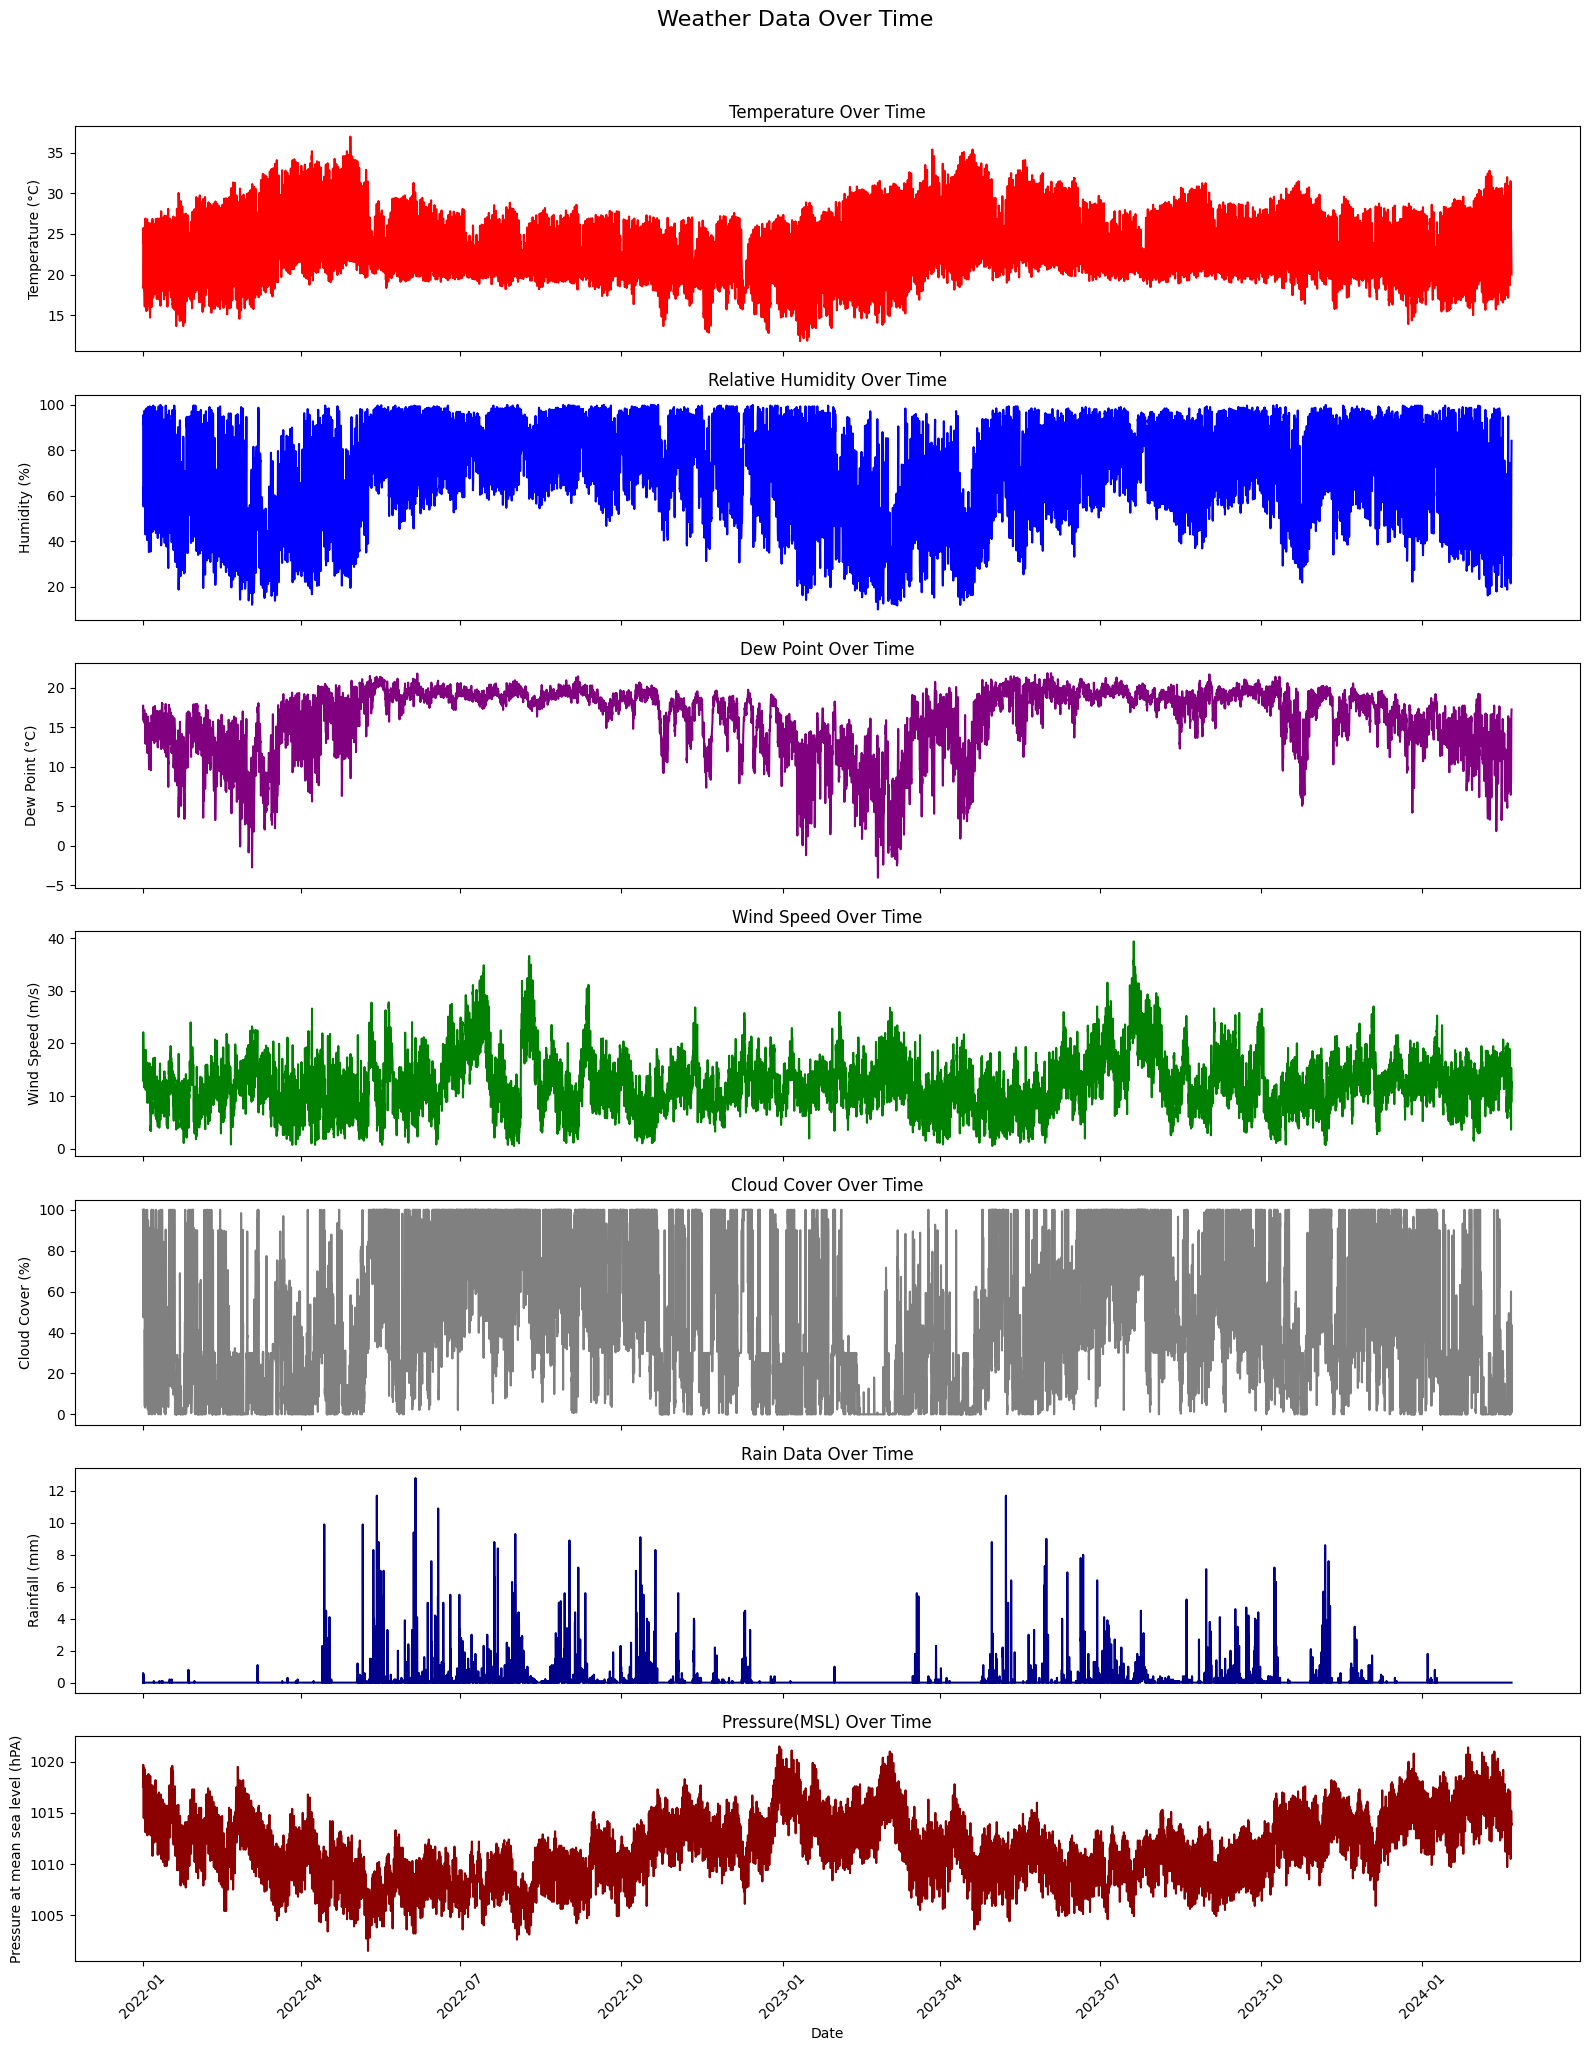

In [ ]:
fig, pos = plt.subplots(7, 1, figsize=(16, 22), sharex=True)
fig.suptitle('Weather Data Over Time', fontsize=16)

pos[0].plot(wrk_df_2['date'], wrk_df_2['temperature_2m'], color='red')
pos[0].set_ylabel('Temperature (°C)')
pos[0].set_title('Temperature Over Time')

pos[1].plot(wrk_df_2['date'], wrk_df_2['relative_humidity_2m'], color='blue')
pos[1].set_ylabel('Humidity (%)')
pos[1].set_title('Relative Humidity Over Time')

pos[2].plot(wrk_df_2['date'], wrk_df_2['dew_point_2m'], color='purple')
pos[2].set_ylabel('Dew Point (°C)')
pos[2].set_title('Dew Point Over Time')

pos[3].plot(wrk_df_2['date'], wrk_df_2['wind_speed_10m'], color='green')
pos[3].set_ylabel('Wind Speed (m/s)')
pos[3].set_title('Wind Speed Over Time')

pos[4].plot(wrk_df_2['date'], wrk_df_2['cloud_cover'], color='gray')
pos[4].set_ylabel('Cloud Cover (%)')
pos[4].set_title('Cloud Cover Over Time')

pos[5].plot(wrk_df_2['date'], wrk_df_2['rain'], color='darkblue')
pos[5].set_ylabel('Rainfall (mm)')
pos[5].set_title('Rain Data Over Time')

pos[6].plot(wrk_df_2['date'], wrk_df_2['pressure_msl'], color='darkred')
pos[6].set_ylabel('Pressure at mean sea level (hPA)')
pos[6].set_title('Pressure(MSL) Over Time')

plt.xticks(rotation=45)
pos[-1].set_xlabel('Date')

plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()

In [ ]:
def count_nulls(df):
    nc = {}
    for col in df.columns:
        count = 0
        for val in df[col]:
            if pd.isna(val):
                count += 1
        nc[col] = count
    return nc

In [ ]:
def info(df):
    rows = df.shape[0]
    cols = df.shape[1]
    col_info = df.dtypes
    null_counts = count_nulls(df)
    non_null_counts = {col: rows - null_counts[col] for col in df.columns}
    print(f"RangeIndex: {rows} entries, 0 to {rows - 1}")
    print(f"Data columns (total {cols} columns):")
    print("  No  Column                  Non-Null   Null Count     Dtype       Min             Max")
    print("  --- ------                  --------   ----------     -----       ---             ---")
    col_no = 1
    for col in df.columns:
        dtype = str(col_info[col])
        non_null = non_null_counts[col]
        null_count = null_counts[col]
        min_val = df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else "N/A"
        max_val = df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else "N/A"
        print(f"  {col_no:<3} {col:<25} {non_null:<10} {null_count:<12} {dtype:<10} {min_val:<15} {max_val}")
        col_no += 1

In [ ]:
info(wrk_df_2.iloc[:,1:])

RangeIndex: 18744 entries, 0 to 18743
Data columns (total 17 columns):
  No  Column                  Non-Null   Null Count     Dtype       Min             Max
  --- ------                  --------   ----------     -----       ---             ---
  1   temperature_2m            18744      0            float64    11.796          36.996
  2   relative_humidity_2m      18744      0            float64    9.9298725       100.0
  3   dew_point_2m              18744      0            float64    -4.054          21.846
  4   apparent_temperature      18744      0            float64    10.869806       37.499794
  5   precipitation             18744      0            float64    0.0             12.8
  6   rain                      18744      0            float64    0.0             12.8
  7   pressure_msl              18744      0            float64    1001.5          1021.5
  8   surface_pressure          18744      0            float64    903.1194        919.80994
  9   cloud_cover               

In [ ]:
def plot_boxplots(df, columns,xcol):
    num_cols = len(columns)
    plt.figure(figsize=(15, 5 * num_cols))

    for i, col in enumerate(columns):
        plt.subplot(num_cols, 1, i + 1)
        sns.boxplot(data=df, x=xcol, y=col,palette='Reds')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(xcol)

    plt.tight_layout()
    plt.show()

<ipython-input-30-920e6510800c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=xcol, y=col,palette='Reds')
<ipython-input-30-920e6510800c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=xcol, y=col,palette='Reds')
<ipython-input-30-920e6510800c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=xcol, y=col,palette='Reds')
<ipython-input-30-920e6510800c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

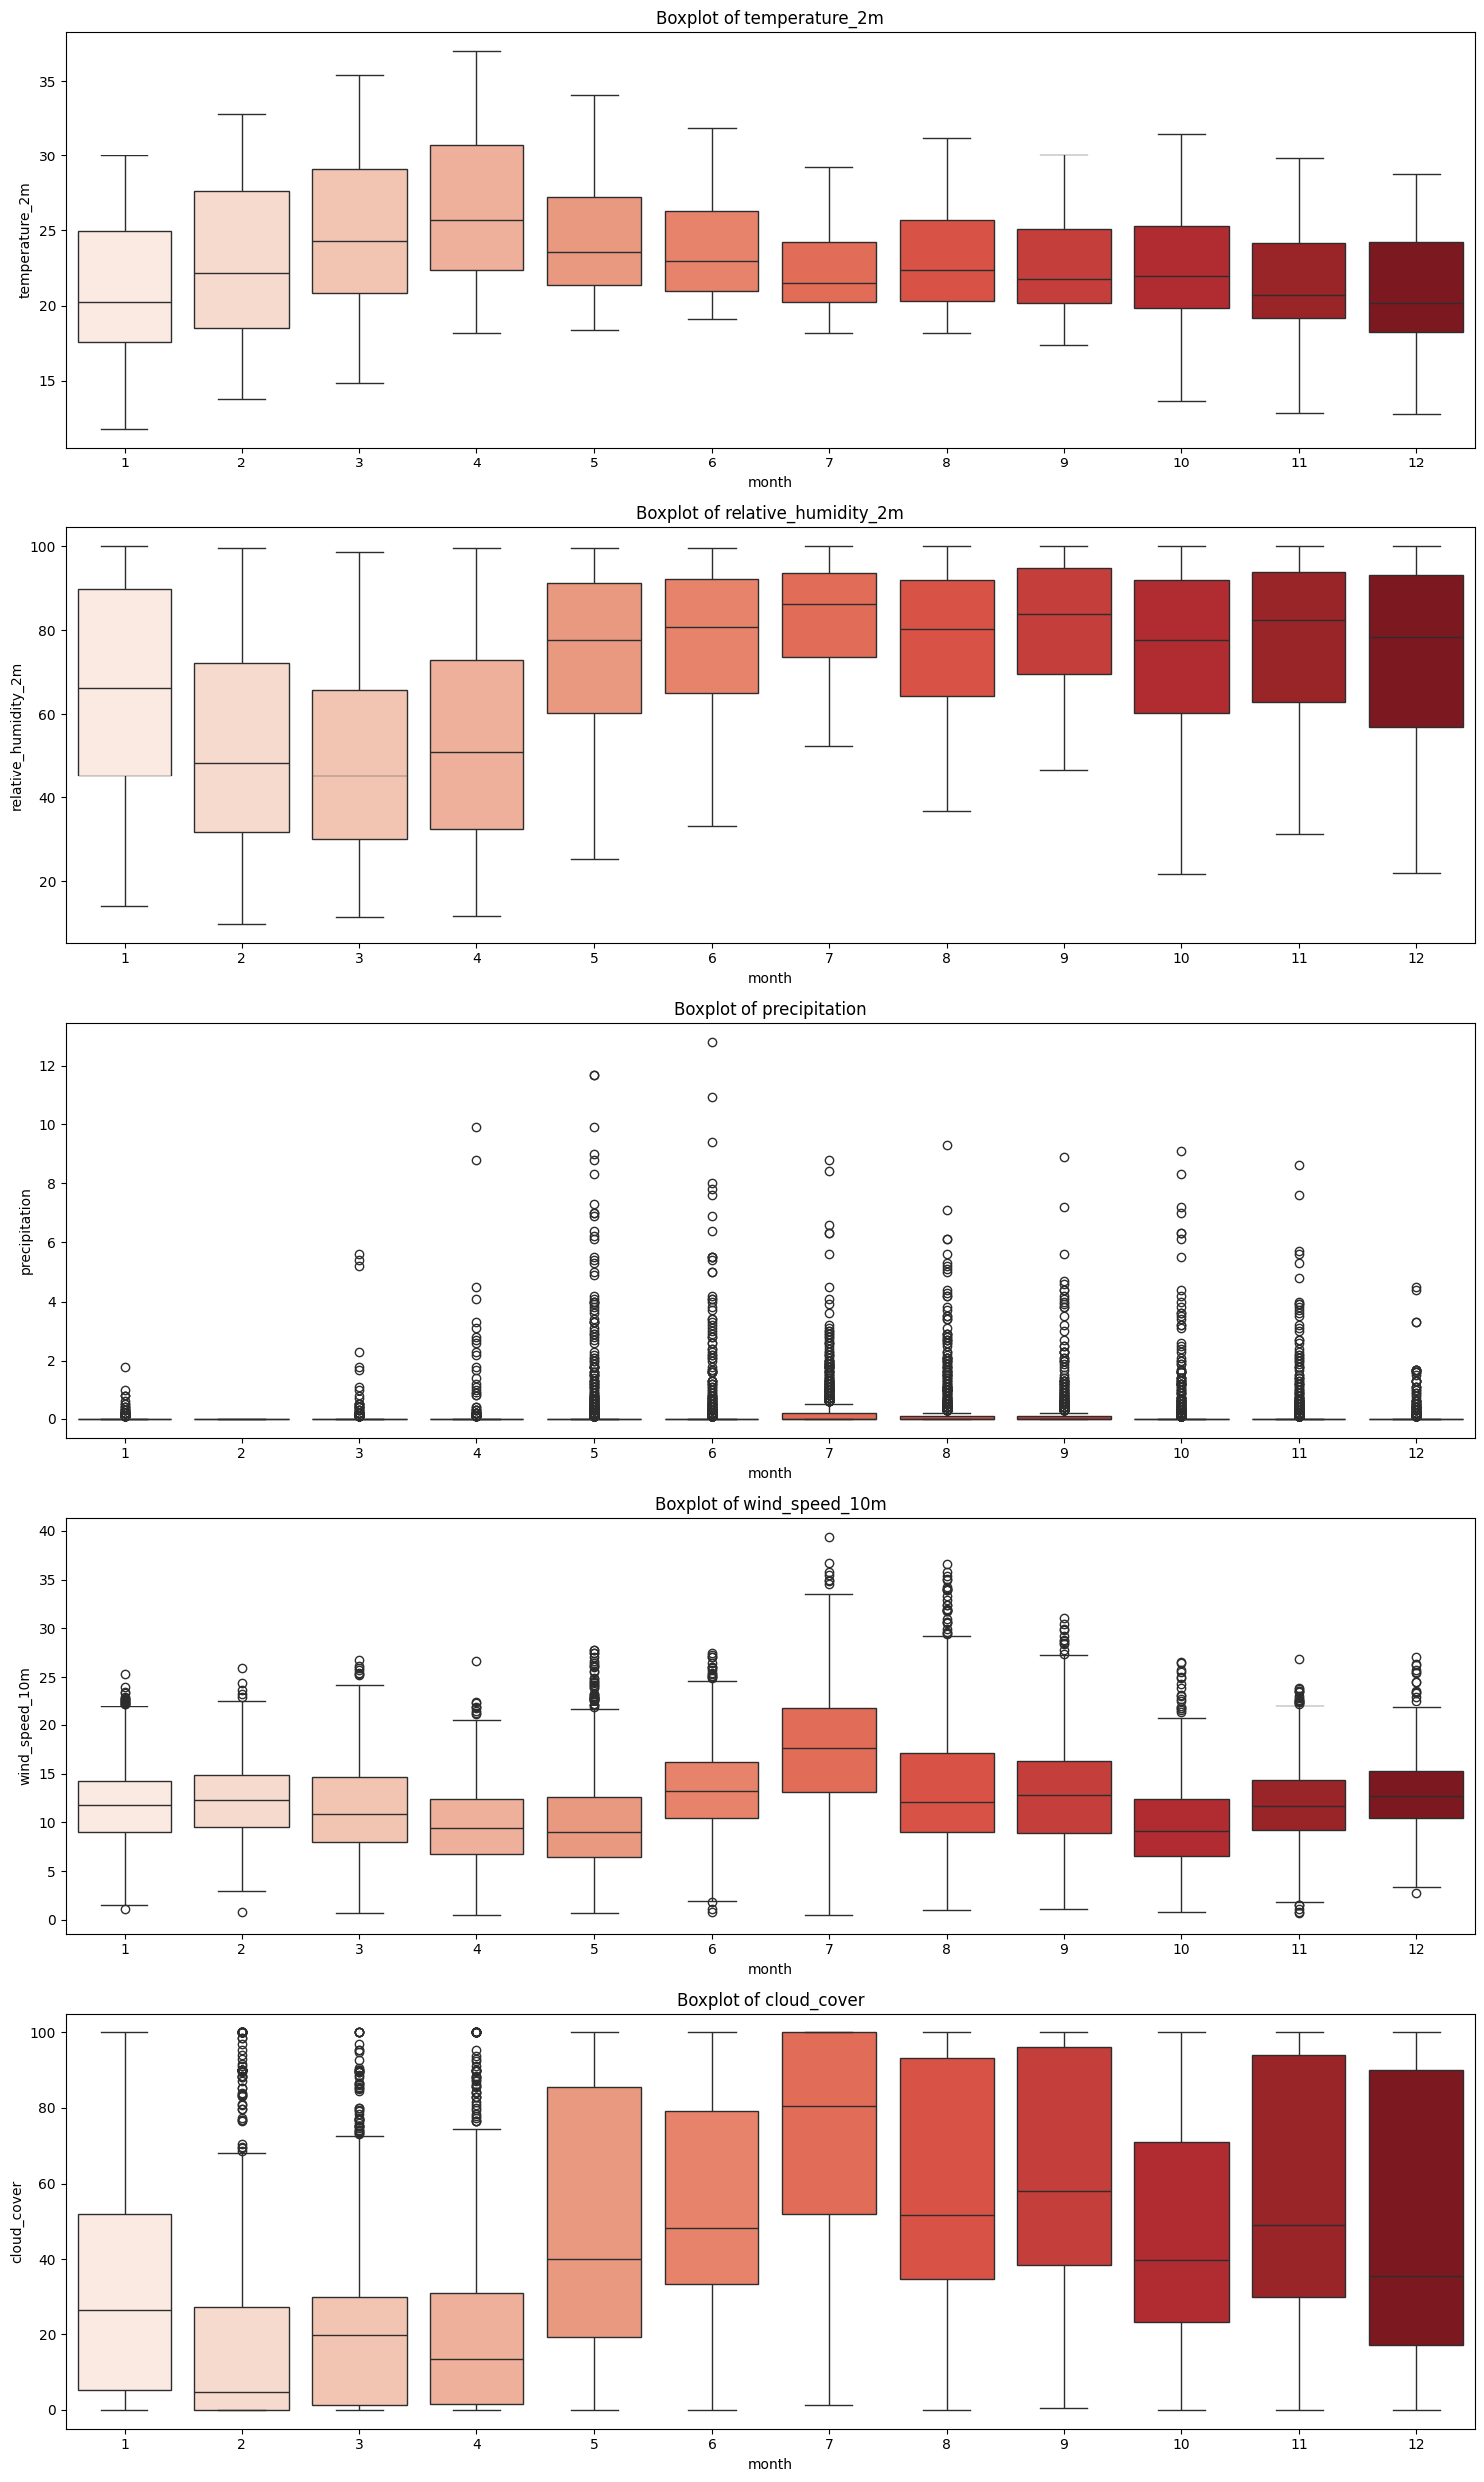

In [ ]:
columns_to_plot = ["temperature_2m","relative_humidity_2m","precipitation","wind_speed_10m","cloud_cover"]
wrk_df_2['month'] = pd.to_datetime(wrk_df_2['date']).dt.month
plot_boxplots(wrk_df_2, columns_to_plot, xcol='month')

In [ ]:
wrk_df_2

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
105192,2022-01-01 00:00:00+00:00,18.396,91.846924,17.046,18.765324,0.0,0.0,1017.6,914.60254,100.000000,100,0,53,14.587776,23.838960,74.248764,75.124275,25.919998
105193,2022-01-01 01:00:00+00:00,18.596,92.149680,17.296,19.324055,0.0,0.0,1018.0,915.02856,99.600000,100,0,32,12.864649,19.483284,72.071990,73.909120,25.560000
105194,2022-01-01 02:00:00+00:00,18.496,95.398870,17.746,18.649084,0.6,0.6,1018.9,915.80440,90.000000,100,0,0,18.161278,26.200977,76.239200,77.300420,30.239998
105195,2022-01-01 03:00:00+00:00,19.696,86.317120,17.346,19.302998,0.1,0.1,1019.6,916.83000,74.400000,71,1,33,20.696085,28.739187,76.930680,77.704750,34.920000
105196,2022-01-01 04:00:00+00:00,21.646,74.162950,16.846,20.832577,0.0,0.0,1019.7,917.55830,82.200000,75,6,37,22.101183,29.871325,77.774895,77.471200,39.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,22.196,65.590680,15.446,22.125502,0.0,0.0,1014.6,913.14680,23.400002,0,39,0,13.104198,24.993437,127.184790,131.496370,25.560000
123932,2024-02-20 20:00:00+00:00,21.746,71.633500,16.396,22.293646,0.0,0.0,1014.4,912.82150,19.500000,0,27,11,11.480557,22.406927,131.185820,136.301880,21.960000
123933,2024-02-20 21:00:00+00:00,21.096,77.192530,16.946,21.693005,0.0,0.0,1014.1,912.34100,43.800003,0,73,0,12.722830,23.277834,115.114810,121.723560,21.240000
123934,2024-02-20 22:00:00+00:00,20.596,80.873620,17.196,21.372244,0.0,0.0,1013.8,911.90845,1.200000,0,2,0,12.229406,22.657131,132.614030,134.356340,21.240000


In [ ]:
wrk_df_2.drop(['month'],axis=1,inplace=True)
wrk_df_2

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
105192,2022-01-01 00:00:00+00:00,18.396,91.846924,17.046,18.765324,0.0,0.0,1017.6,914.60254,100.000000,100,0,53,14.587776,23.838960,74.248764,75.124275,25.919998
105193,2022-01-01 01:00:00+00:00,18.596,92.149680,17.296,19.324055,0.0,0.0,1018.0,915.02856,99.600000,100,0,32,12.864649,19.483284,72.071990,73.909120,25.560000
105194,2022-01-01 02:00:00+00:00,18.496,95.398870,17.746,18.649084,0.6,0.6,1018.9,915.80440,90.000000,100,0,0,18.161278,26.200977,76.239200,77.300420,30.239998
105195,2022-01-01 03:00:00+00:00,19.696,86.317120,17.346,19.302998,0.1,0.1,1019.6,916.83000,74.400000,71,1,33,20.696085,28.739187,76.930680,77.704750,34.920000
105196,2022-01-01 04:00:00+00:00,21.646,74.162950,16.846,20.832577,0.0,0.0,1019.7,917.55830,82.200000,75,6,37,22.101183,29.871325,77.774895,77.471200,39.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,22.196,65.590680,15.446,22.125502,0.0,0.0,1014.6,913.14680,23.400002,0,39,0,13.104198,24.993437,127.184790,131.496370,25.560000
123932,2024-02-20 20:00:00+00:00,21.746,71.633500,16.396,22.293646,0.0,0.0,1014.4,912.82150,19.500000,0,27,11,11.480557,22.406927,131.185820,136.301880,21.960000
123933,2024-02-20 21:00:00+00:00,21.096,77.192530,16.946,21.693005,0.0,0.0,1014.1,912.34100,43.800003,0,73,0,12.722830,23.277834,115.114810,121.723560,21.240000
123934,2024-02-20 22:00:00+00:00,20.596,80.873620,17.196,21.372244,0.0,0.0,1013.8,911.90845,1.200000,0,2,0,12.229406,22.657131,132.614030,134.356340,21.240000


In [ ]:
def calculate_correlation_matrix(df):
    cols = df.select_dtypes(include=['float64', 'int64']).columns
    matrix = {col: {col2: 0 for col2 in cols} for col in cols}
    for i in range(len(cols)):
        for j in range(i,len(cols)):
            c1= cols[i]
            c2 = cols[j]
            mean1 = df[c1].mean()
            mean2 = df[c2].mean()
            covariance = ((df[c1] - mean1) * (df[c2] - mean2)).mean()
            std1 = ((df[c1] - mean1) ** 2).mean() ** 0.5
            std2 = ((df[c2] - mean2) ** 2).mean() ** 0.5
            if std1 > 0 and std2 > 0:
                correlation = covariance / (std1 * std2)
            else:
                correlation = 1000000

            matrix[c1][c2] = correlation
            matrix[c2][c1] = correlation

    return matrix

def display(matrix):
    print("Correlation Matrix:")
    for i, j in matrix.items():
        print(f"{i}: {j}")

In [ ]:
crr_m = calculate_correlation_matrix(wrk_df_2)
display(crr_m)

Correlation Matrix:
temperature_2m: {'temperature_2m': 1.0, 'relative_humidity_2m': -0.7789594238676466, 'dew_point_2m': -0.22622415195808776, 'apparent_temperature': 0.9299612727282306, 'precipitation': -0.0024698184532950676, 'rain': -0.0024698184532950676, 'pressure_msl': -0.38763984665196505, 'surface_pressure': 0.07102826269718486, 'cloud_cover': -0.13355829291525456, 'cloud_cover_low': -0.21219169106841604, 'cloud_cover_mid': 0.07459469003490057, 'cloud_cover_high': -0.06261238743872077, 'wind_speed_10m': 0.10049746226382213, 'wind_speed_100m': -0.24066504688719334, 'wind_direction_10m': 0.09644539874680896, 'wind_direction_100m': 0.07637714790757673, 'wind_gusts_10m': 0.36278992678115835}
relative_humidity_2m: {'temperature_2m': -0.7789594238676466, 'relative_humidity_2m': 1.0, 'dew_point_2m': 0.7497373488337451, 'apparent_temperature': -0.5337484546845273, 'precipitation': 0.10247273730351404, 'rain': 0.10247273730351404, 'pressure_msl': 0.034642282293038236, 'surface_pressure'

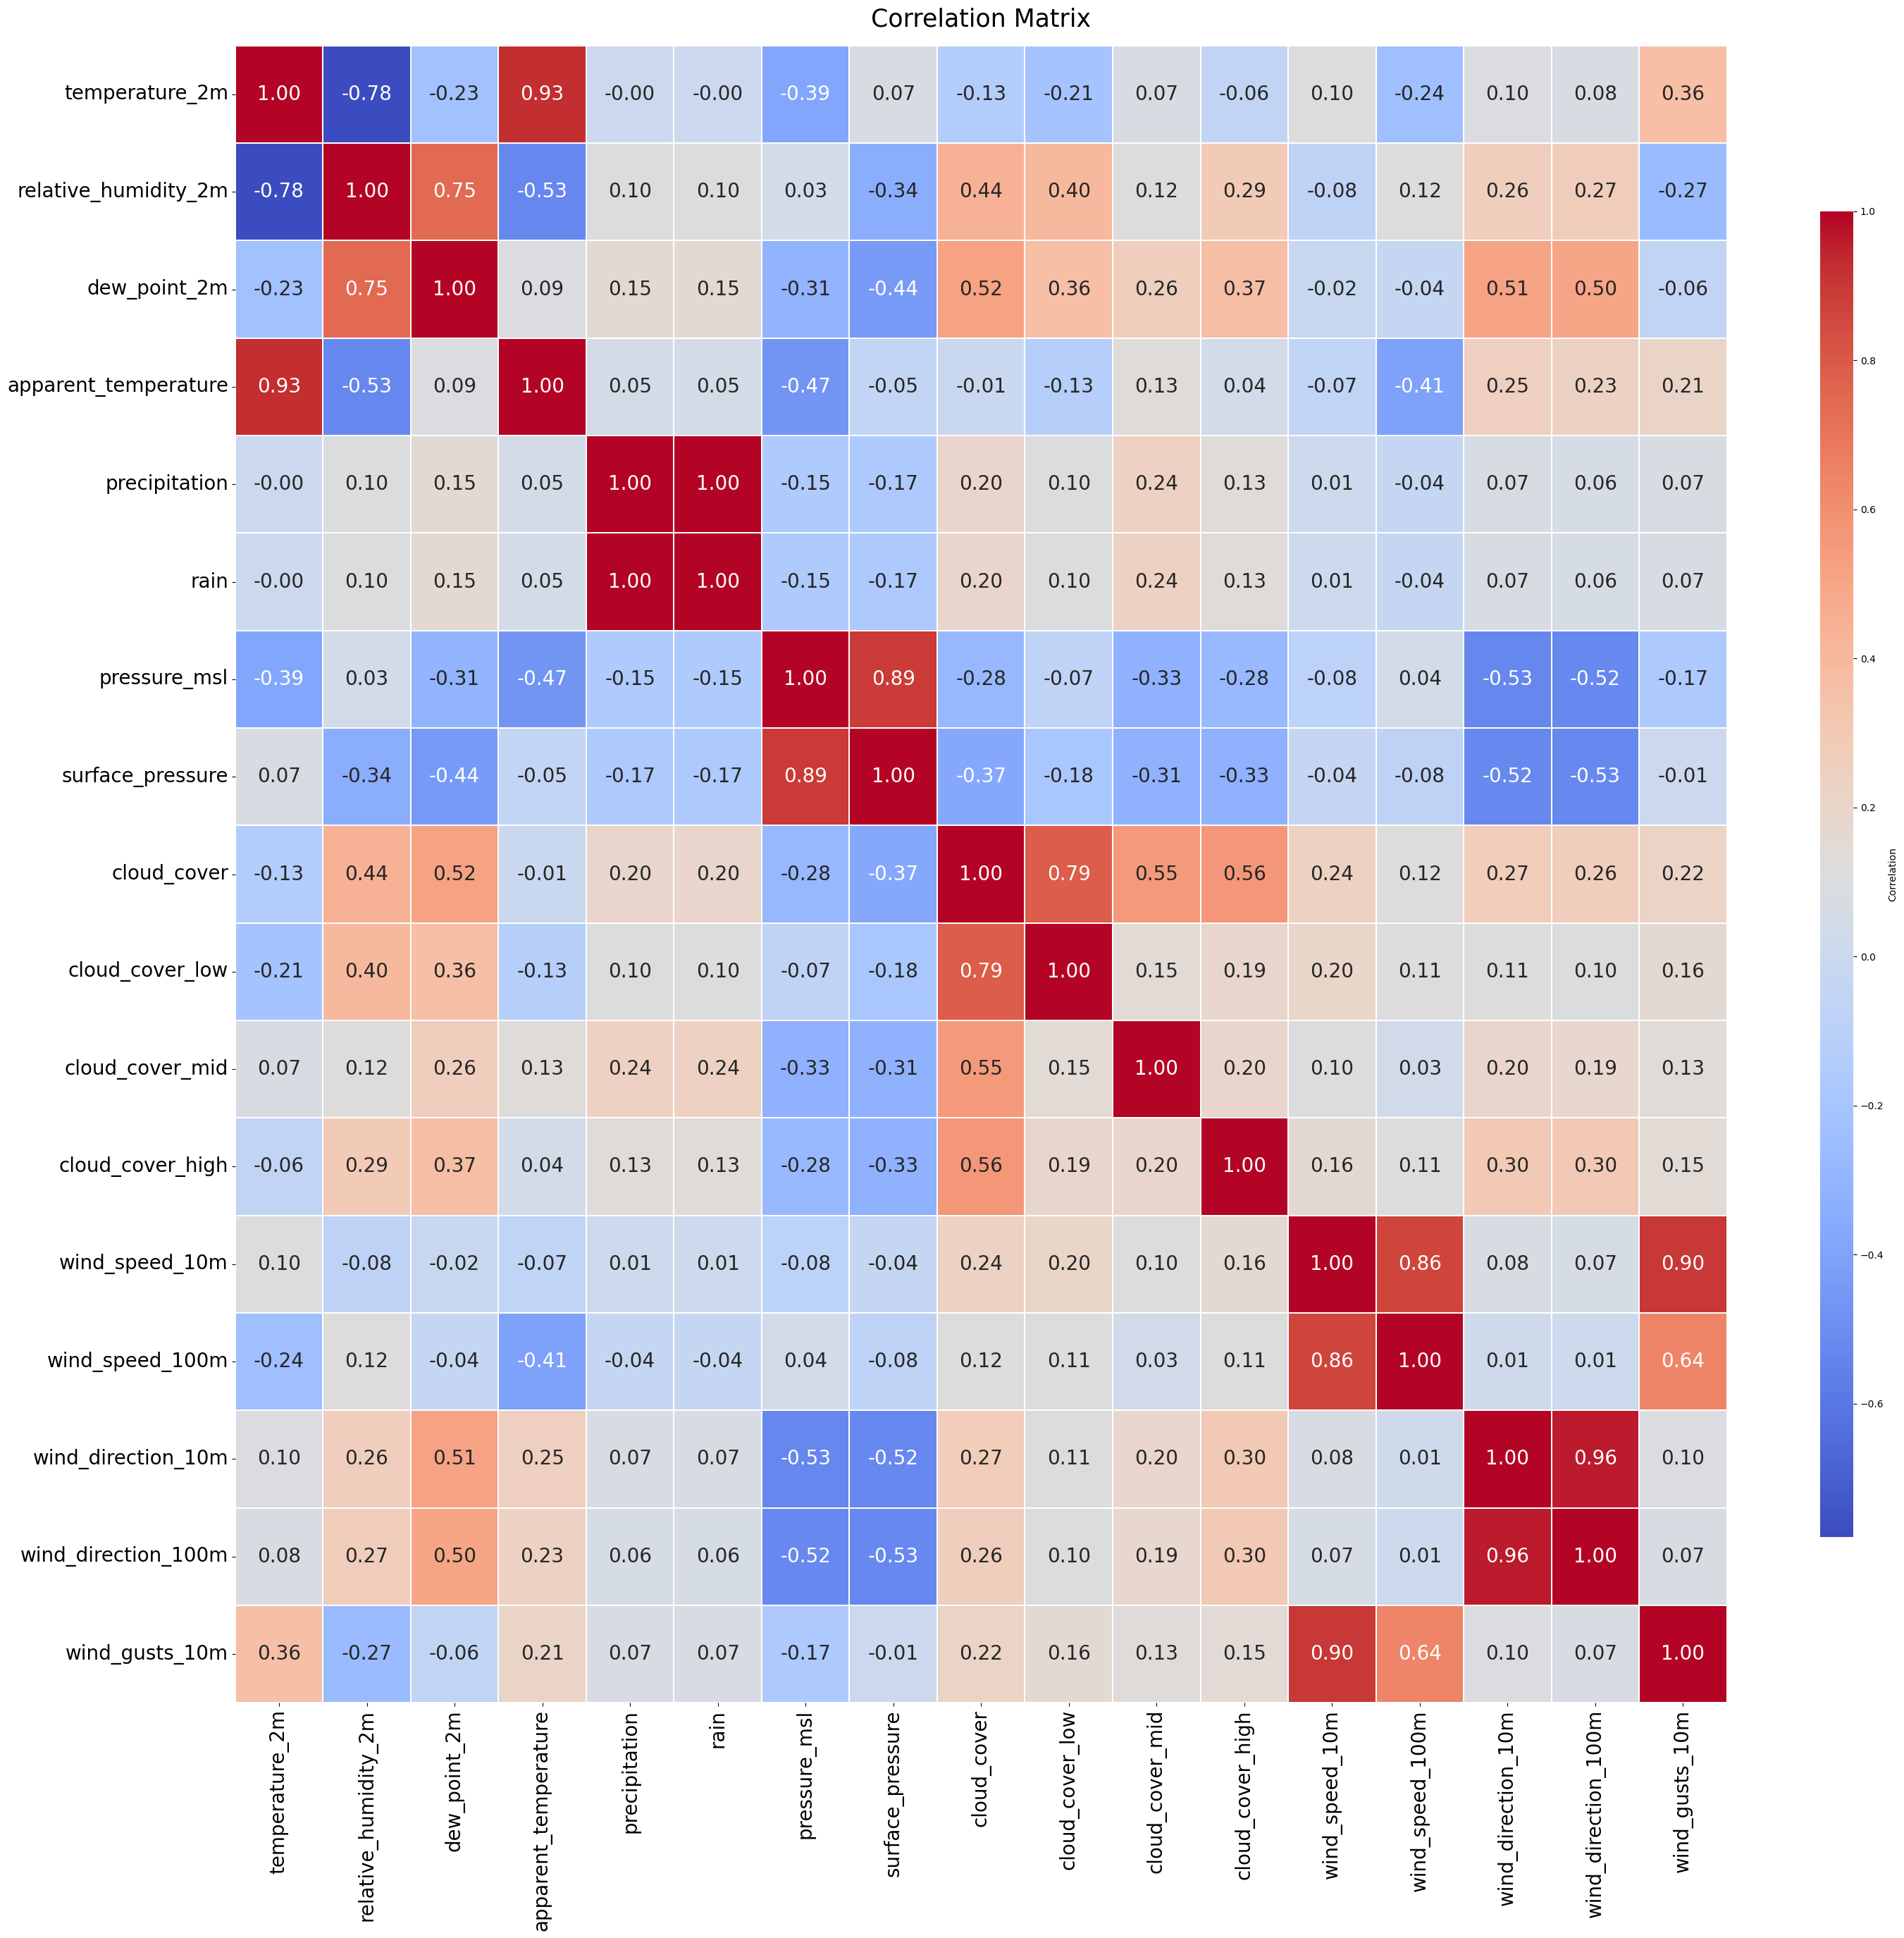

In [ ]:
crr_df = pd.DataFrame(crr_m)
plt.figure(figsize=(30, 30))
sns.heatmap(crr_df, annot=True, fmt=".2f", cmap="coolwarm", linewidth=1.2, annot_kws={"size": 20}, cbar_kws={'shrink': 0.8, 'aspect': 40, 'label': 'Correlation'})
plt.title('Correlation Matrix', fontsize=25, pad=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
def standardize_columns(df):
    for col in df.columns[1:]:
        mean = df[col].mean()
        std_dev = df[col].std()
        df[col] = (df[col] - mean) / std_dev
    return df

In [ ]:
wrk_df_3 = standardize_columns(wrk_df_2)
print(wrk_df_3)

                            date  temperature_2m  relative_humidity_2m  \
105192 2022-01-01 00:00:00+00:00       -1.097565              0.981870   
105193 2022-01-01 01:00:00+00:00       -1.049390              0.995195   
105194 2022-01-01 02:00:00+00:00       -1.073477              1.138208   
105195 2022-01-01 03:00:00+00:00       -0.784433              0.738476   
105196 2022-01-01 04:00:00+00:00       -0.314734              0.203512   
...                          ...             ...                   ...   
123931 2024-02-20 19:00:00+00:00       -0.182256             -0.173795   
123932 2024-02-20 20:00:00+00:00       -0.290647              0.092179   
123933 2024-02-20 21:00:00+00:00       -0.447213              0.336859   
123934 2024-02-20 22:00:00+00:00       -0.567649              0.498881   
123935 2024-02-20 23:00:00+00:00       -0.712171              0.644986   

        dew_point_2m  apparent_temperature  precipitation      rain  \
105192      0.253682             -1.1024

In [ ]:
wrk_df_3

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
105192,2022-01-01 00:00:00+00:00,-1.097565,0.981870,0.253682,-1.102408,-0.188758,-0.188758,1.786608,1.389033,1.618348,2.316388,-0.643853,-0.115657,0.470676,0.545320,-1.030220,-1.042179,0.194020
105193,2022-01-01 01:00:00+00:00,-1.049390,0.995195,0.312485,-0.976676,-0.188758,-0.188758,1.910040,1.547136,1.606735,2.316388,-0.643853,-0.593304,0.130126,-0.043286,-1.053416,-1.055070,0.155121
105194,2022-01-01 02:00:00+00:00,-1.073477,1.138208,0.418329,-1.128566,0.878911,0.878911,2.187764,1.835063,1.328022,2.316388,-0.643853,-1.321147,1.176925,0.864512,-1.009010,-1.019094,0.660815
105195,2022-01-01 03:00:00+00:00,-0.784433,0.738476,0.324245,-0.981414,-0.010813,-0.010813,2.403771,2.215680,0.875115,1.457271,-0.609458,-0.570559,1.677892,1.207514,-1.001642,-1.014804,1.166510
105196,2022-01-01 04:00:00+00:00,-0.314734,0.203512,0.206641,-0.637211,-0.188758,-0.188758,2.434629,2.485965,1.101568,1.575770,-0.437482,-0.479579,1.955589,1.360505,-0.992646,-1.017282,1.711104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,-0.182256,-0.173795,-0.122652,-0.346262,-0.188758,-0.188758,0.860864,0.848783,-0.605544,-0.646084,0.697564,-1.321147,0.177469,0.701331,-0.466137,-0.444159,0.155121
123932,2024-02-20 20:00:00+00:00,-0.290647,0.092179,0.100796,-0.308424,-0.188758,-0.188758,0.799147,0.728059,-0.718771,-0.646084,0.284820,-1.070951,-0.143420,0.351802,-0.423503,-0.393180,-0.233875
123933,2024-02-20 21:00:00+00:00,-0.447213,0.336859,0.230161,-0.443587,-0.188758,-0.188758,0.706573,0.549738,-0.013281,-0.646084,1.867005,-1.321147,0.102097,0.469492,-0.594754,-0.547833,-0.311674
123934,2024-02-20 22:00:00+00:00,-0.567649,0.498881,0.288964,-0.515768,-0.188758,-0.188758,0.613999,0.389211,-1.250067,-0.646084,-0.575063,-1.321147,0.004579,0.385613,-0.408284,-0.413819,-0.311674


In [ ]:
def calculate_covariance_matrix(df):
    cols = df.select_dtypes(include=['float64', 'int64']).columns
    matrix = {col: {col2: 0 for col2 in cols} for col in cols}
    for i in range(len(cols)):
        for j in range(i,len(cols)):
            c1= cols[i]
            c2 = cols[j]
            mean1 = df[c1].mean()
            mean2 = df[c2].mean()
            covariance = ((df[c1] - mean1) * (df[c2] - mean2)).mean()
            matrix[c1][c2] = covariance
            matrix[c2][c1] = covariance
    return matrix

In [ ]:
cvr_m = calculate_covariance_matrix(wrk_df_3)
cvr_df = pd.DataFrame(cvr_m)
cvr_df

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
temperature_2m,0.999947,-0.778918,-0.226212,0.929912,-0.002470,-0.002470,-0.387619,0.071024,-0.133551,-0.212180,0.074591,-0.062609,0.100492,-0.240652,0.096440,0.076373,0.362771
relative_humidity_2m,-0.778918,0.999947,0.749697,-0.533720,0.102467,0.102467,0.034640,-0.343572,0.442136,0.399092,0.122553,0.286900,-0.077982,0.123733,0.258198,0.266112,-0.268408
dew_point_2m,-0.226212,0.749697,0.999947,0.090867,0.152914,0.152914,-0.306416,-0.439843,0.518628,0.361290,0.262632,0.372505,-0.024601,-0.040061,0.509210,0.502175,-0.056274
apparent_temperature,0.929912,-0.533720,0.090867,0.999947,0.045899,0.045899,-0.469279,-0.051110,-0.008229,-0.125276,0.129617,0.035327,-0.069564,-0.408525,0.253787,0.233233,0.211610
precipitation,-0.002470,0.102467,0.152914,0.045899,0.999947,0.999947,-0.154773,-0.167949,0.198475,0.096905,0.237422,0.130733,0.007897,-0.036938,0.073459,0.064166,0.073502
rain,-0.002470,0.102467,0.152914,0.045899,0.999947,0.999947,-0.154773,-0.167949,0.198475,0.096905,0.237422,0.130733,0.007897,-0.036938,0.073459,0.064166,0.073502
pressure_msl,-0.387619,0.034640,-0.306416,-0.469279,-0.154773,-0.154773,0.999947,0.891865,-0.284648,-0.074194,-0.325602,-0.275007,-0.084503,0.035331,-0.529322,-0.523232,-0.171144
surface_pressure,0.071024,-0.343572,-0.439843,-0.051110,-0.167949,-0.167949,0.891865,0.999947,-0.372016,-0.183755,-0.314698,-0.326543,-0.041357,-0.079280,-0.523449,-0.526758,-0.006635
cloud_cover,-0.133551,0.442136,0.518628,-0.008229,0.198475,0.198475,-0.284648,-0.372016,0.999947,0.785626,0.554720,0.562286,0.241595,0.124300,0.273806,0.258545,0.218432
cloud_cover_low,-0.212180,0.399092,0.361290,-0.125276,0.096905,0.096905,-0.074194,-0.183755,0.785626,0.999947,0.145453,0.187574,0.202656,0.111539,0.112213,0.102321,0.156490


In [ ]:
cvr_np= cvr_df.to_numpy()
cvr_np

array([[ 0.99994665, -0.77891787, -0.22621208,  0.92991166, -0.00246969,
        -0.00246969, -0.38761917,  0.07102447, -0.13355117, -0.21218037,
         0.07459071, -0.06260905,  0.1004921 , -0.24065221,  0.09644025,
         0.07637307,  0.36277057],
       [-0.77891787,  0.99994665,  0.74969735, -0.53371998,  0.10246727,
         0.10246727,  0.03464043, -0.34357238,  0.44213553,  0.39909229,
         0.12255295,  0.28690034, -0.0779818 ,  0.12373307,  0.25819808,
         0.26611246, -0.26840789],
       [-0.22621208,  0.74969735,  0.99994665,  0.09086656,  0.15291398,
         0.15291398, -0.3064158 , -0.43984312,  0.51862824,  0.36129016,
         0.26263226,  0.37250503, -0.02460121, -0.04006055,  0.50920996,
         0.50217474, -0.0562741 ],
       [ 0.92991166, -0.53371998,  0.09086656,  0.99994665,  0.04589889,
         0.04589889, -0.46927873, -0.05110973, -0.0082291 , -0.12527644,
         0.12961718,  0.03532656, -0.06956375, -0.4085252 ,  0.25378741,
         0.23323276

In [ ]:
eigenv, vect = np.linalg.eig(cvr_np)
desc_indx = np.argsort(eigenv)[::-1]
eigen_val = eigenv[desc_indx]
eigen_vec = vect[:, desc_indx]

print(eigen_val)
print(eigen_vec)

[ 4.61808508e+00  3.09508308e+00  2.69579983e+00  1.97490159e+00
  1.36583254e+00  9.52897205e-01  7.63562975e-01  7.29931322e-01
  5.42679114e-01  1.23640003e-01  3.72958249e-02  3.50660134e-02
  3.08484659e-02  2.92869295e-02  4.15919654e-03  2.38811119e-05
 -4.07235624e-17]
[[-3.74450646e-02  5.45637425e-01 -2.06091592e-02  3.58417792e-02
  -1.83607468e-01  9.70203135e-02  9.45705956e-03  2.93915853e-02
  -8.65155205e-02 -2.13163970e-01  2.07320643e-02 -3.03636809e-02
   1.40292717e-01 -1.02775820e-01  6.86563055e-01 -3.14961940e-01
   3.55616183e-13]
 [ 2.47976551e-01 -4.35821281e-01  1.06594780e-01 -6.88313600e-02
   5.16965158e-02  8.61709499e-02  2.28935731e-02 -4.44508045e-02
  -3.24261690e-01  1.07910400e-01 -1.61437294e-02  3.27385956e-02
   4.13931692e-01 -6.28010960e-01  1.89590779e-01  8.04222738e-03
  -1.05877308e-14]
 [ 3.43305406e-01 -1.33487538e-01  1.49448195e-01 -7.95596830e-02
  -7.51142317e-02  2.66629402e-01  2.27945303e-02 -9.32906274e-02
  -6.59138198e-01 -8.587

In [ ]:
def plot_scree(eigen_val):
    variance_ratio = eigen_val / np.sum(eigen_val)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigen_val) + 1), variance_ratio, marker='.', linestyle='-', color='darkblue', linewidth=2)
    plt.title('Scree Plot of Explained Variance', fontsize=16)
    plt.xlabel('Principal Component', fontsize=14)
    plt.ylabel('Explained Variance Ratio', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(visible=True, linestyle=':', linewidth=0.5, color='gray', alpha=0.7)
    plt.ylim(0, 0.4)
    plt.xlim(0.5, len(eigen_val) + 0.5)
    plt.show()

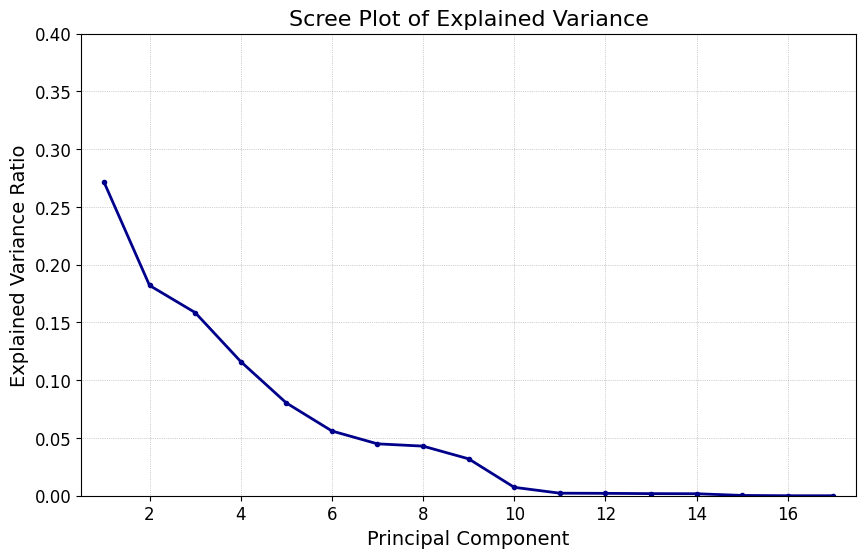

In [ ]:
plot_scree(eigen_val)

In [ ]:
def plot_cuml(eigen_val):
    variance_ratio = eigen_val / np.sum(eigen_val)
    cuml = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigen_val) + 1), cuml, marker='.', linestyle='-', color='darkblue', linewidth=2)
    plt.title('cumulative Plot of Explained Variance', fontsize=16)
    plt.xlabel('Principal Component', fontsize=14)
    plt.ylabel('Cumulative Explained Variance ', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(visible=True, linestyle=':', linewidth=0.5, color='gray', alpha=0.7)
    plt.ylim(0, 1.0)
    plt.xlim(0.5, len(eigen_val) + 0.5)
    plt.show()

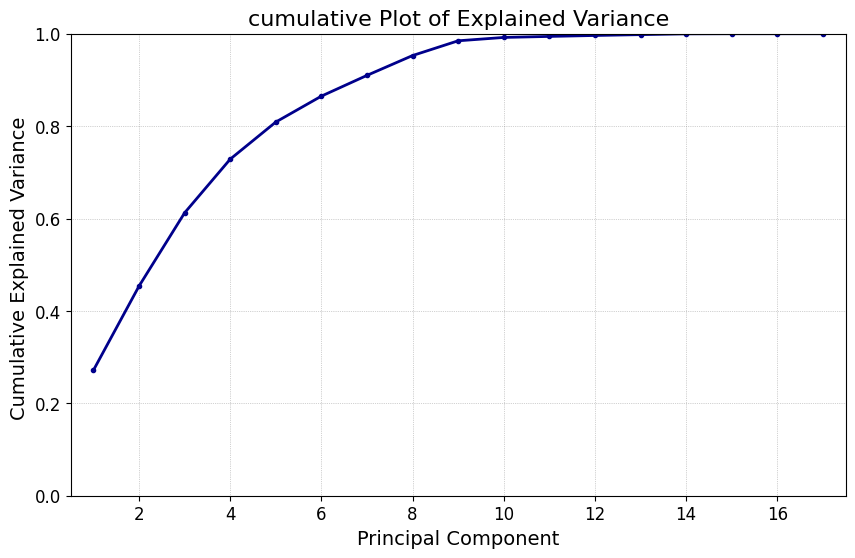

In [ ]:
plot_cuml(eigen_val)

In [ ]:
wrk_df_3['date'] = pd.to_datetime(wrk_df_3['date'], errors='coerce')
wrk_df_3['date'].head(10)

,date
105192,2022-01-01 00:00:00+00:00
105193,2022-01-01 01:00:00+00:00
105194,2022-01-01 02:00:00+00:00
105195,2022-01-01 03:00:00+00:00
105196,2022-01-01 04:00:00+00:00
105197,2022-01-01 05:00:00+00:00
105198,2022-01-01 06:00:00+00:00
105199,2022-01-01 07:00:00+00:00
105200,2022-01-01 08:00:00+00:00
105201,2022-01-01 09:00:00+00:00


In [ ]:
pcdata= wrk_df_3.copy()

In [ ]:
date_col = pd.to_datetime(pcdata['date'], errors='coerce')
print(date_col)
pcdata.drop(['date'],axis=1,inplace=True)
pcdata

105192   2022-01-01 00:00:00+00:00
105193   2022-01-01 01:00:00+00:00
105194   2022-01-01 02:00:00+00:00
105195   2022-01-01 03:00:00+00:00
105196   2022-01-01 04:00:00+00:00
                    ...           
123931   2024-02-20 19:00:00+00:00
123932   2024-02-20 20:00:00+00:00
123933   2024-02-20 21:00:00+00:00
123934   2024-02-20 22:00:00+00:00
123935   2024-02-20 23:00:00+00:00
Name: date, Length: 18744, dtype: datetime64[ns, UTC]


,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
105192,-1.097565,0.981870,0.253682,-1.102408,-0.188758,-0.188758,1.786608,1.389033,1.618348,2.316388,-0.643853,-0.115657,0.470676,0.545320,-1.030220,-1.042179,0.194020
105193,-1.049390,0.995195,0.312485,-0.976676,-0.188758,-0.188758,1.910040,1.547136,1.606735,2.316388,-0.643853,-0.593304,0.130126,-0.043286,-1.053416,-1.055070,0.155121
105194,-1.073477,1.138208,0.418329,-1.128566,0.878911,0.878911,2.187764,1.835063,1.328022,2.316388,-0.643853,-1.321147,1.176925,0.864512,-1.009010,-1.019094,0.660815
105195,-0.784433,0.738476,0.324245,-0.981414,-0.010813,-0.010813,2.403771,2.215680,0.875115,1.457271,-0.609458,-0.570559,1.677892,1.207514,-1.001642,-1.014804,1.166510
105196,-0.314734,0.203512,0.206641,-0.637211,-0.188758,-0.188758,2.434629,2.485965,1.101568,1.575770,-0.437482,-0.479579,1.955589,1.360505,-0.992646,-1.017282,1.711104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,-0.182256,-0.173795,-0.122652,-0.346262,-0.188758,-0.188758,0.860864,0.848783,-0.605544,-0.646084,0.697564,-1.321147,0.177469,0.701331,-0.466137,-0.444159,0.155121
123932,-0.290647,0.092179,0.100796,-0.308424,-0.188758,-0.188758,0.799147,0.728059,-0.718771,-0.646084,0.284820,-1.070951,-0.143420,0.351802,-0.423503,-0.393180,-0.233875
123933,-0.447213,0.336859,0.230161,-0.443587,-0.188758,-0.188758,0.706573,0.549738,-0.013281,-0.646084,1.867005,-1.321147,0.102097,0.469492,-0.594754,-0.547833,-0.311674
123934,-0.567649,0.498881,0.288964,-0.515768,-0.188758,-0.188758,0.613999,0.389211,-1.250067,-0.646084,-0.575063,-1.321147,0.004579,0.385613,-0.408284,-0.413819,-0.311674


In [ ]:
mean_vec = np.mean(pcdata, axis=0)
data_vec = pcdata - mean_vec
print(data_vec)

        temperature_2m  relative_humidity_2m  dew_point_2m  \
105192       -1.097565              0.981870      0.253682   
105193       -1.049390              0.995195      0.312485   
105194       -1.073477              1.138208      0.418329   
105195       -0.784433              0.738476      0.324245   
105196       -0.314734              0.203512      0.206641   
...                ...                   ...           ...   
123931       -0.182256             -0.173795     -0.122652   
123932       -0.290647              0.092179      0.100796   
123933       -0.447213              0.336859      0.230161   
123934       -0.567649              0.498881      0.288964   
123935       -0.712171              0.644986      0.300724   

        apparent_temperature  precipitation      rain  pressure_msl  \
105192             -1.102408      -0.188758 -0.188758      1.786608   
105193             -0.976676      -0.188758 -0.188758      1.910040   
105194             -1.128566       0.87891

In [ ]:
num_comp = 9
proj_dir = eigen_vec[:, :num_comp]
pca_data = np.dot(data_vec, proj_dir)
print(pca_data)

[[-0.42965892 -3.15251635 -1.630563   ...  0.73534515  0.45961279
   0.24935951]
 [-0.72950845 -3.07361233 -1.09314923 ...  1.09958551  0.27396762
   0.18725184]
 [-0.52624682 -3.16645128 -2.33192779 ...  1.76274204 -0.08505501
  -0.12221572]
 ...
 [-0.74175342 -0.88232999 -0.29596871 ...  0.41622977 -2.25971742
  -0.62507615]
 [-1.51385941 -0.98554703  0.06465934 ...  0.70481188 -0.38593508
  -0.9473666 ]
 [-1.44264236 -1.13752333  0.76360967 ...  0.69061871 -0.36467639
  -0.73543934]]


In [ ]:
pca_df = pd.DataFrame(pca_data,columns=[f"PC{i+1}" for i in range(num_comp)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.429659,-3.152516,-1.630563,0.488941,-2.114999,1.164842,0.735345,0.459613,0.249360
1,-0.729508,-3.073612,-1.093149,0.603323,-2.329717,1.335825,1.099586,0.273968,0.187252
2,-0.526247,-3.166451,-2.331928,1.804551,-1.266828,1.893988,1.762742,-0.085055,-0.122216
3,-1.145665,-2.576507,-3.108380,0.641345,-1.241958,1.957615,0.622785,-0.389311,-0.357243
4,-1.203321,-1.854799,-3.760416,0.547535,-1.714875,2.121866,0.554122,-0.524271,-0.245199
...,...,...,...,...,...,...,...,...,...
18739,-1.473324,-0.377860,-0.737108,0.127765,0.345557,-0.118948,0.487515,-1.479701,-0.427888
18740,-1.408553,-0.607412,-0.060756,0.008766,0.397229,0.051783,0.331052,-1.066189,-0.552990
18741,-0.741753,-0.882330,-0.295969,0.344051,-0.189530,-0.860012,0.416230,-2.259717,-0.625076
18742,-1.513859,-0.985547,0.064659,-0.299252,1.098946,0.169445,0.704812,-0.385935,-0.947367


In [ ]:
pca_df.insert(0, 'date', date_col)
pca_df

,date,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2022-01-01 00:00:00+00:00,-0.429659,-3.152516,-1.630563,0.488941,-2.114999,1.164842,0.735345,0.459613,0.249360
1,2022-01-01 01:00:00+00:00,-0.729508,-3.073612,-1.093149,0.603323,-2.329717,1.335825,1.099586,0.273968,0.187252
2,2022-01-01 02:00:00+00:00,-0.526247,-3.166451,-2.331928,1.804551,-1.266828,1.893988,1.762742,-0.085055,-0.122216
3,2022-01-01 03:00:00+00:00,-1.145665,-2.576507,-3.108380,0.641345,-1.241958,1.957615,0.622785,-0.389311,-0.357243
4,2022-01-01 04:00:00+00:00,-1.203321,-1.854799,-3.760416,0.547535,-1.714875,2.121866,0.554122,-0.524271,-0.245199
...,...,...,...,...,...,...,...,...,...,...
18739,2024-02-20 19:00:00+00:00,-1.473324,-0.377860,-0.737108,0.127765,0.345557,-0.118948,0.487515,-1.479701,-0.427888
18740,2024-02-20 20:00:00+00:00,-1.408553,-0.607412,-0.060756,0.008766,0.397229,0.051783,0.331052,-1.066189,-0.552990
18741,2024-02-20 21:00:00+00:00,-0.741753,-0.882330,-0.295969,0.344051,-0.189530,-0.860012,0.416230,-2.259717,-0.625076
18742,2024-02-20 22:00:00+00:00,-1.513859,-0.985547,0.064659,-0.299252,1.098946,0.169445,0.704812,-0.385935,-0.947367


In [ ]:
pca_df

,date,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2022-01-01 00:00:00+00:00,-0.429659,-3.152516,-1.630563,0.488941,-2.114999,1.164842,0.735345,0.459613,0.249360
1,2022-01-01 01:00:00+00:00,-0.729508,-3.073612,-1.093149,0.603323,-2.329717,1.335825,1.099586,0.273968,0.187252
2,2022-01-01 02:00:00+00:00,-0.526247,-3.166451,-2.331928,1.804551,-1.266828,1.893988,1.762742,-0.085055,-0.122216
3,2022-01-01 03:00:00+00:00,-1.145665,-2.576507,-3.108380,0.641345,-1.241958,1.957615,0.622785,-0.389311,-0.357243
4,2022-01-01 04:00:00+00:00,-1.203321,-1.854799,-3.760416,0.547535,-1.714875,2.121866,0.554122,-0.524271,-0.245199
...,...,...,...,...,...,...,...,...,...,...
18739,2024-02-20 19:00:00+00:00,-1.473324,-0.377860,-0.737108,0.127765,0.345557,-0.118948,0.487515,-1.479701,-0.427888
18740,2024-02-20 20:00:00+00:00,-1.408553,-0.607412,-0.060756,0.008766,0.397229,0.051783,0.331052,-1.066189,-0.552990
18741,2024-02-20 21:00:00+00:00,-0.741753,-0.882330,-0.295969,0.344051,-0.189530,-0.860012,0.416230,-2.259717,-0.625076
18742,2024-02-20 22:00:00+00:00,-1.513859,-0.985547,0.064659,-0.299252,1.098946,0.169445,0.704812,-0.385935,-0.947367


In [ ]:
pca_df.to_csv('new_val.csv', index=False)

from google.colab import files
files.download('new_val.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
new_val=pd.read_csv('/content/new_val.csv')
new_val

,date,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2022-01-01 00:00:00+00:00,-0.429659,-3.152516,-1.630563,0.488941,-2.114999,1.164842,0.735345,0.459613,0.249360
1,2022-01-01 01:00:00+00:00,-0.729508,-3.073612,-1.093149,0.603323,-2.329717,1.335825,1.099586,0.273968,0.187252
2,2022-01-01 02:00:00+00:00,-0.526247,-3.166451,-2.331928,1.804551,-1.266828,1.893988,1.762742,-0.085055,-0.122216
3,2022-01-01 03:00:00+00:00,-1.145665,-2.576507,-3.108380,0.641345,-1.241958,1.957615,0.622785,-0.389311,-0.357243
4,2022-01-01 04:00:00+00:00,-1.203321,-1.854799,-3.760416,0.547535,-1.714875,2.121866,0.554122,-0.524271,-0.245199
...,...,...,...,...,...,...,...,...,...,...
18739,2024-02-20 19:00:00+00:00,-1.473324,-0.377860,-0.737108,0.127765,0.345557,-0.118948,0.487515,-1.479701,-0.427888
18740,2024-02-20 20:00:00+00:00,-1.408553,-0.607412,-0.060756,0.008766,0.397229,0.051783,0.331052,-1.066189,-0.552990
18741,2024-02-20 21:00:00+00:00,-0.741753,-0.882330,-0.295969,0.344051,-0.189530,-0.860012,0.416230,-2.259717,-0.625076
18742,2024-02-20 22:00:00+00:00,-1.513859,-0.985547,0.064659,-0.299252,1.098946,0.169445,0.704812,-0.385935,-0.947367


In [ ]:
eda_crr = calculate_correlation_matrix(new_val.iloc[:, 1:])
eda_crr_df = pd.DataFrame(eda_crr)
eda_crr_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.000000e+00,2.663109e-16,-4.125574e-17,-4.619256e-17,3.864010e-16,4.394784e-16,2.906946e-16,-8.456992e-16,4.980681e-17
PC2,2.663109e-16,1.000000e+00,3.191623e-16,-1.392210e-16,-1.268474e-16,1.765870e-17,-1.114571e-16,-1.472867e-16,-7.019909e-17
PC3,-4.125574e-17,3.191623e-16,1.000000e+00,-5.888157e-16,3.508555e-16,2.648983e-17,-2.029191e-16,-3.026643e-16,3.008734e-17
PC4,-4.619256e-17,-1.392210e-16,-5.888157e-16,1.000000e+00,-2.178856e-16,-7.438874e-16,-8.149608e-17,2.146956e-16,2.563195e-16
PC5,3.864010e-16,-1.268474e-16,3.508555e-16,-2.178856e-16,1.000000e+00,-1.209505e-15,1.700091e-16,-3.644680e-16,8.313036e-16
PC6,4.394784e-16,1.765870e-17,2.648983e-17,-7.438874e-16,-1.209505e-15,1.000000e+00,-2.488688e-16,-1.039059e-15,-4.480766e-16
PC7,2.906946e-16,-1.114571e-16,-2.029191e-16,-8.149608e-17,1.700091e-16,-2.488688e-16,1.000000e+00,4.427728e-16,7.749788e-16
PC8,-8.456992e-16,-1.472867e-16,-3.026643e-16,2.146956e-16,-3.644680e-16,-1.039059e-15,4.427728e-16,1.000000e+00,4.776267e-16
PC9,4.980681e-17,-7.019909e-17,3.008734e-17,2.563195e-16,8.313036e-16,-4.480766e-16,7.749788e-16,4.776267e-16,1.000000e+00


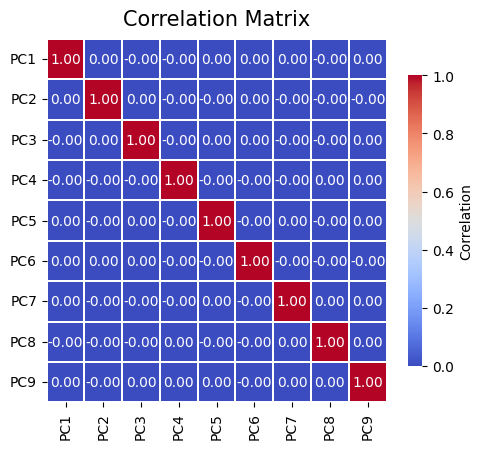

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(eda_crr_df, annot=True, fmt=".2f", cmap="coolwarm", linewidth=1.2, annot_kws={"size": 10}, cbar_kws={'shrink': 0.8, 'aspect': 20, 'label': 'Correlation'})
plt.title('Correlation Matrix', fontsize=15, pad=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
def initialize_centroids(df, n):
    np.random.seed(42)
    indices = np.random.choice(df.shape[0], n, replace=False)
    return df[indices]


def L2_distances(df, centroids):
    return np.linalg.norm(df[:, np.newaxis] - centroids, axis=2)

def update_centroids_km(df, clusters, n):
    return np.array([df[clusters == k].mean(axis=0) for k in range(n)])


def kmeans_clustering(df, n, max_iter=100, tol=1e-4):
    centroids = initialize_centroids(df, n)
    for _ in range(max_iter):
        distances = L2_distances(df, centroids)
        clusters = np.argmin(distances, axis=1)
        new_centroids = update_centroids_km(df, clusters, n)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return clusters, centroids

def km_css(df, clusters, centroids):
    css = 0
    for k in range(centroids.shape[0]):
        points = df[clusters == k]
        css += np.sum((points - centroids[k]) ** 2)
    return css

def optimal_k(data, max_k=25):
    lcss = []
    for k in range(1, max_k + 1):
        clusters, centroids = kmeans_clustering(data,k)
        lcss.append(km_css(data, clusters, centroids))
    return lcss

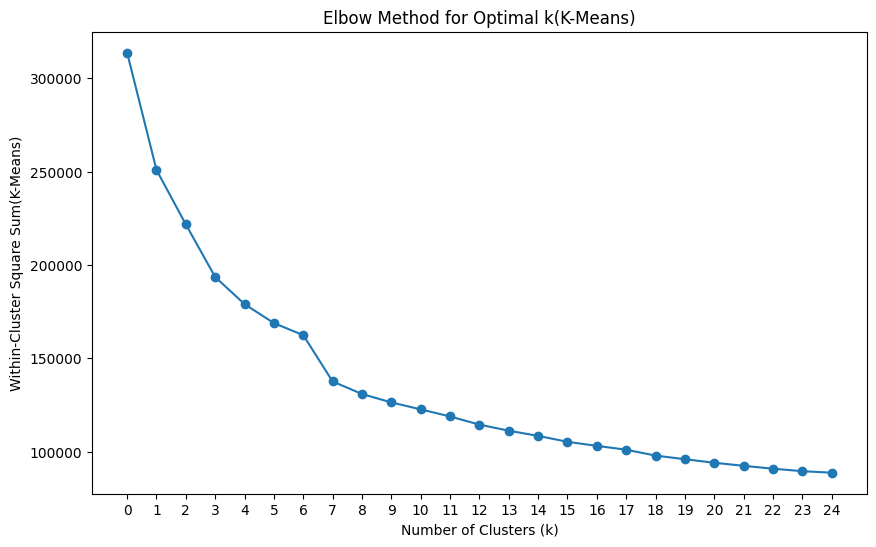

In [ ]:
df_n = new_val.iloc[:, 1:].values
wcss = optimal_k(df_n)
plt.figure(figsize=(10, 6))
plt.plot(wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Square Sum(K-Means)')
plt.title('Elbow Method for Optimal k(K-Means)')
plt.xticks(range(len(wcss)))
plt.show()

In [ ]:
df_n = new_val.iloc[:, 1:].values

In [ ]:
def initialize_memberships(df, n):
    memberships = np.random.rand(df.shape[0], n)
    memberships = memberships / np.sum(memberships, axis=1, keepdims=True)
    return memberships

def update_centroids_fcm(df, memberships, m):
    return np.dot(memberships.T ** m, df)/np.sum(memberships.T ** m, axis=1, keepdims=True)

def update_memberships_fcm(df, centroids, m):
    distances = np.linalg.norm(df[:, np.newaxis] - centroids, axis=2)
    inv_distances = 1.0 / (distances + 1e-10)
    inv_distances = inv_distances ** (2 / (m - 1))
    memberships = inv_distances / np.sum(inv_distances, axis=1, keepdims=True)
    return memberships

def fuzzy_cmeans_clustering(df, n, m, max_iter=100, tol=1e-4):
    memberships = initialize_memberships(df, n)
    for _ in range(max_iter):
        centroids = update_centroids_fcm(df, memberships, m)
        new_memberships = update_memberships_fcm(df, centroids, m)
        if np.all(np.abs(new_memberships - memberships) < tol):
            break
        memberships = new_memberships
    return memberships, centroids

def fuzzy_css(df, memberships, centroids, m):
    css = 0
    for c in range(centroids.shape[0]):
        distances = np.linalg.norm(df - centroids[c], axis=1)
        css += np.sum((memberships[:, c] ** m) * distances ** 2)
    return css

def optimal_c_fcm(data,m, max_c=25):
    lcss = []
    for c in range(1, max_c + 1):
        memberships, centroids = fuzzy_cmeans_clustering(data, c, m)
        lcss.append(fuzzy_css(data, memberships, centroids, m))
    return lcss

def assign_clusters(memberships):
    return np.argmax(memberships, axis=1)

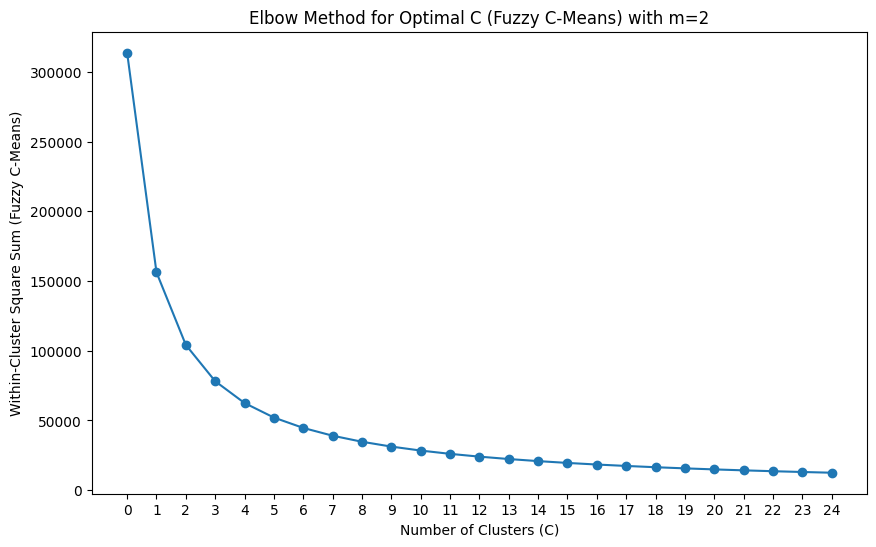

In [ ]:
def fuzzy_plot(m1):
    wcss_fcm = optimal_c_fcm(df_n,m=m1)
    plt.figure(figsize=(10, 6))
    plt.plot(wcss_fcm, marker='o')
    plt.xlabel('Number of Clusters (C)')
    plt.ylabel('Within-Cluster Square Sum (Fuzzy C-Means)')
    plt.title(f'Elbow Method for Optimal C (Fuzzy C-Means) with m={m1}')
    plt.xticks(range(len(wcss_fcm)))
    plt.show()

fuzzy_plot(2)

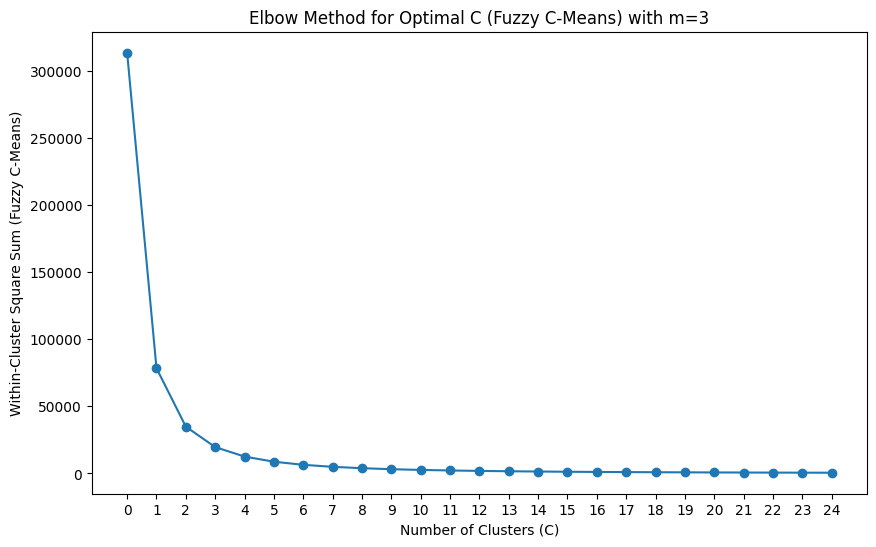

In [ ]:
fuzzy_plot(3)

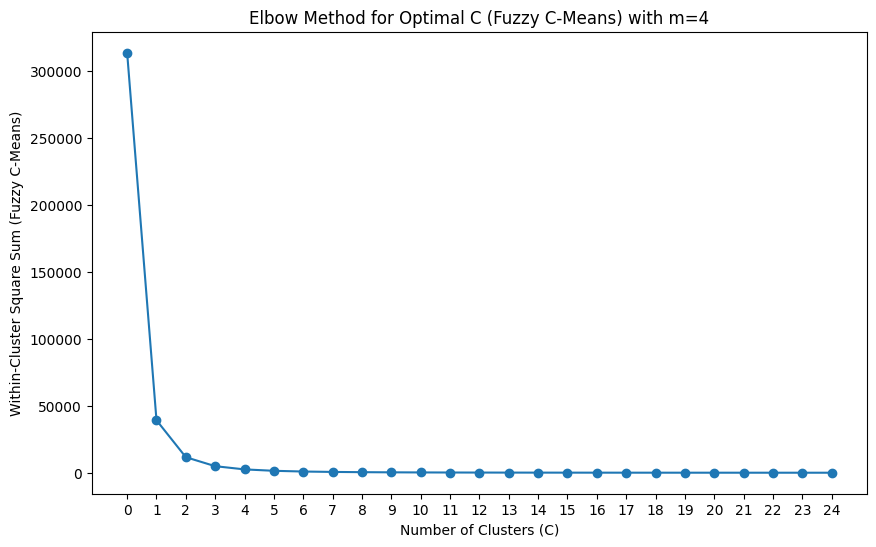

In [ ]:
fuzzy_plot(4)

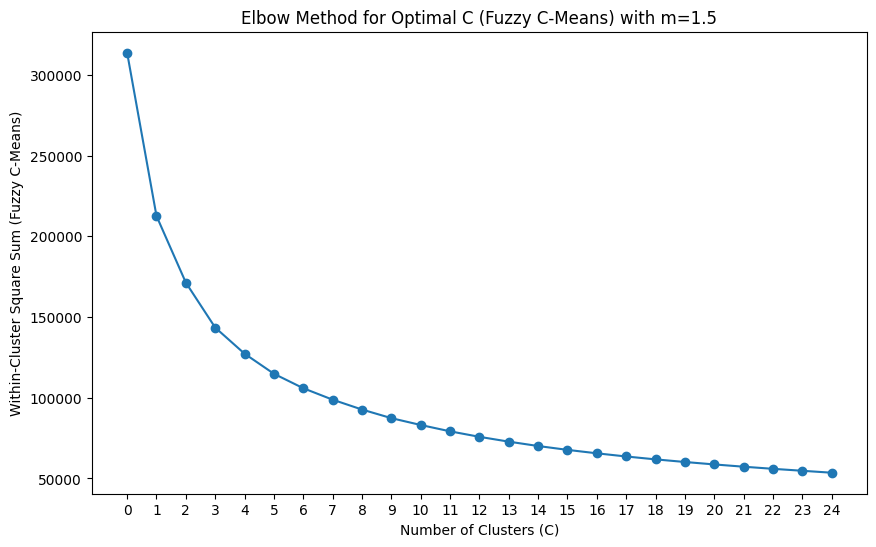

In [ ]:
fuzzy_plot(1.5)

In [ ]:
def fcm_silhouette_score(df, memberships, centroids, m):
    n_p = df.shape[0]
    n_c = centroids.shape[0]
    silhouette_scores = []

    for i in range(n_p):
        distances = np.linalg.norm(df[i] - centroids, axis=1)
        a_i = 0
        for c in range(n_c):
            if c == np.argmax(memberships[i]):
                a_i += memberships[i, c] ** m * distances[c]

        a_i /= np.sum(memberships[i] ** m)
        b_i = float('inf')
        for c in range(n_c):
            if c != np.argmax(memberships[i]):
                b_i_temp = np.sum(memberships[:, c] ** m * distances[c]) / np.sum(memberships[:, c] ** m)
                b_i = min(b_i, b_i_temp)

        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0
        silhouette_scores.append(s_i)
    return np.mean(silhouette_scores)

def fcm_plt(df, c, m_val, max_iter=100, tol=1e-4):
    fsi_scores = []
    for m in m_val:
        memberships, centroids = fuzzy_cmeans_clustering(df, c, m, max_iter, tol)
        fsi = fcm_silhouette_score(df, memberships, centroids, m)
        fsi_scores.append(fsi)
    plt.figure(figsize=(10, 6))
    plt.plot(m_val, fsi_scores, marker='o')
    plt.xlabel('Fuzziness Parameter (m)')
    plt.ylabel('Fuzzy Silhouette Index (FSI)')
    plt.title(f'FSI vs. Fuzziness Parameter (m) for number of clusters ={c}')
    plt.xticks(m_val)
    plt.grid(False)
    plt.show()

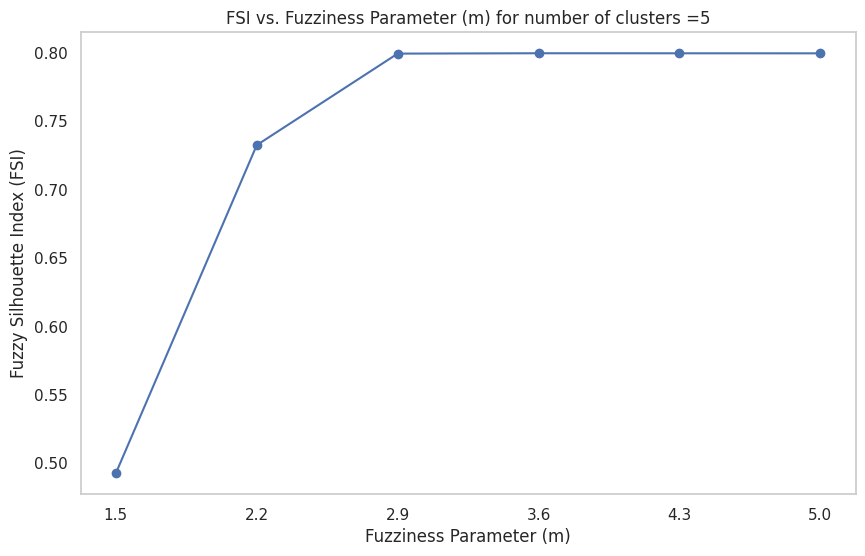

In [ ]:
list_m = np.linspace(1.5, 5, 6)
fcm_plt(df_n, c=5, m_val=list_m)

In [ ]:
def assign_clusters(memberships):
    return np.argmax(memberships, axis=1)

memberships, centroids = fuzzy_cmeans_clustering(df_n, n=5, m=2.9)
clusters = assign_clusters(memberships)

for i in clusters:
  print(i)

Streaming output truncated to the last 5000 lines.
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
4
4
4
1

In [ ]:
new_val['Cluster'] = clusters

In [ ]:
new_val

,date,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Cluster
0,2022-01-01 00:00:00+00:00,-0.429659,-3.152516,-1.630563,0.488941,-2.114999,1.164842,0.735345,0.459613,0.249360,3
1,2022-01-01 01:00:00+00:00,-0.729508,-3.073612,-1.093149,0.603323,-2.329717,1.335825,1.099586,0.273968,0.187252,3
2,2022-01-01 02:00:00+00:00,-0.526247,-3.166451,-2.331928,1.804551,-1.266828,1.893988,1.762742,-0.085055,-0.122216,3
3,2022-01-01 03:00:00+00:00,-1.145665,-2.576507,-3.108380,0.641345,-1.241958,1.957615,0.622785,-0.389311,-0.357243,3
4,2022-01-01 04:00:00+00:00,-1.203321,-1.854799,-3.760416,0.547535,-1.714875,2.121866,0.554122,-0.524271,-0.245199,3
...,...,...,...,...,...,...,...,...,...,...,...
18739,2024-02-20 19:00:00+00:00,-1.473324,-0.377860,-0.737108,0.127765,0.345557,-0.118948,0.487515,-1.479701,-0.427888,0
18740,2024-02-20 20:00:00+00:00,-1.408553,-0.607412,-0.060756,0.008766,0.397229,0.051783,0.331052,-1.066189,-0.552990,0
18741,2024-02-20 21:00:00+00:00,-0.741753,-0.882330,-0.295969,0.344051,-0.189530,-0.860012,0.416230,-2.259717,-0.625076,0
18742,2024-02-20 22:00:00+00:00,-1.513859,-0.985547,0.064659,-0.299252,1.098946,0.169445,0.704812,-0.385935,-0.947367,0


In [ ]:
import pandas as pd
final_df=pd.read_csv('/content/drive/MyDrive/ML _final_project/Bangalore_(till 2024).csv')

In [ ]:
final_df.drop(['snowfall','snow_depth'],axis=1,inplace=True)

In [ ]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df= final_df.iloc[:,1:]
final_df

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,2010-01-01 00:00:00+00:00,16.872002,98.425760,16.622002,17.978365,0.0,0.0,1013.2,910.14270,87.299995,97,0,0,8.311245,13.004921,94.96966,94.763560,13.679999
1,2010-01-01 01:00:00+00:00,16.622002,98.422745,16.372002,17.629425,0.0,0.0,1014.0,910.77800,90.000000,100,0,0,8.280000,12.605142,90.00000,88.363464,13.320000
2,2010-01-01 02:00:00+00:00,16.972000,96.568040,16.422000,17.989653,0.0,0.0,1015.1,911.88293,89.100000,99,0,0,8.350138,13.722565,82.56869,85.486100,15.480000
3,2010-01-01 03:00:00+00:00,18.972000,83.544785,16.122002,19.650670,0.0,0.0,1015.9,913.26500,52.199997,58,0,0,9.826088,12.646200,81.57312,85.101000,20.160000
4,2010-01-01 04:00:00+00:00,21.272001,67.536240,15.022000,21.531075,0.0,0.0,1016.3,914.37750,0.900000,1,0,0,9.726665,13.339445,87.87895,86.906006,26.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,22.196000,65.590680,15.446000,22.125502,0.0,0.0,1014.6,913.14680,23.400002,0,39,0,13.104198,24.993437,127.18479,131.496370,25.560000
123932,2024-02-20 20:00:00+00:00,21.746000,71.633500,16.396000,22.293646,0.0,0.0,1014.4,912.82150,19.500000,0,27,11,11.480557,22.406927,131.18582,136.301880,21.960000
123933,2024-02-20 21:00:00+00:00,21.096000,77.192530,16.946000,21.693005,0.0,0.0,1014.1,912.34100,43.800003,0,73,0,12.722830,23.277834,115.11481,121.723560,21.240000
123934,2024-02-20 22:00:00+00:00,20.596000,80.873620,17.196000,21.372244,0.0,0.0,1013.8,911.90845,1.200000,0,2,0,12.229406,22.657131,132.61403,134.356340,21.240000


In [ ]:
final_df = final_df[(final_df['date'] >= '2022-01-01') & (final_df['date'] <= '2024-12-31')]
final_df

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
105192,2022-01-01 00:00:00+00:00,18.396,91.846924,17.046,18.765324,0.0,0.0,1017.6,914.60254,100.000000,100,0,53,14.587776,23.838960,74.248764,75.124275,25.919998
105193,2022-01-01 01:00:00+00:00,18.596,92.149680,17.296,19.324055,0.0,0.0,1018.0,915.02856,99.600000,100,0,32,12.864649,19.483284,72.071990,73.909120,25.560000
105194,2022-01-01 02:00:00+00:00,18.496,95.398870,17.746,18.649084,0.6,0.6,1018.9,915.80440,90.000000,100,0,0,18.161278,26.200977,76.239200,77.300420,30.239998
105195,2022-01-01 03:00:00+00:00,19.696,86.317120,17.346,19.302998,0.1,0.1,1019.6,916.83000,74.400000,71,1,33,20.696085,28.739187,76.930680,77.704750,34.920000
105196,2022-01-01 04:00:00+00:00,21.646,74.162950,16.846,20.832577,0.0,0.0,1019.7,917.55830,82.200000,75,6,37,22.101183,29.871325,77.774895,77.471200,39.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,22.196,65.590680,15.446,22.125502,0.0,0.0,1014.6,913.14680,23.400002,0,39,0,13.104198,24.993437,127.184790,131.496370,25.560000
123932,2024-02-20 20:00:00+00:00,21.746,71.633500,16.396,22.293646,0.0,0.0,1014.4,912.82150,19.500000,0,27,11,11.480557,22.406927,131.185820,136.301880,21.960000
123933,2024-02-20 21:00:00+00:00,21.096,77.192530,16.946,21.693005,0.0,0.0,1014.1,912.34100,43.800003,0,73,0,12.722830,23.277834,115.114810,121.723560,21.240000
123934,2024-02-20 22:00:00+00:00,20.596,80.873620,17.196,21.372244,0.0,0.0,1013.8,911.90845,1.200000,0,2,0,12.229406,22.657131,132.614030,134.356340,21.240000


In [ ]:
final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce', utc=True)
new_val['date'] = pd.to_datetime(new_val['date'], errors='coerce', utc=True)
final_df = final_df.merge(new_val[['date', 'Cluster']], on='date', how='left')
final_df

<ipython-input-42-65844a14c7a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce', utc=True)


,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Cluster
0,2022-01-01 00:00:00+00:00,18.396,91.846924,17.046,18.765324,0.0,0.0,1017.6,914.60254,100.000000,100,0,53,14.587776,23.838960,74.248764,75.124275,25.919998,3
1,2022-01-01 01:00:00+00:00,18.596,92.149680,17.296,19.324055,0.0,0.0,1018.0,915.02856,99.600000,100,0,32,12.864649,19.483284,72.071990,73.909120,25.560000,3
2,2022-01-01 02:00:00+00:00,18.496,95.398870,17.746,18.649084,0.6,0.6,1018.9,915.80440,90.000000,100,0,0,18.161278,26.200977,76.239200,77.300420,30.239998,3
3,2022-01-01 03:00:00+00:00,19.696,86.317120,17.346,19.302998,0.1,0.1,1019.6,916.83000,74.400000,71,1,33,20.696085,28.739187,76.930680,77.704750,34.920000,3
4,2022-01-01 04:00:00+00:00,21.646,74.162950,16.846,20.832577,0.0,0.0,1019.7,917.55830,82.200000,75,6,37,22.101183,29.871325,77.774895,77.471200,39.960000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18739,2024-02-20 19:00:00+00:00,22.196,65.590680,15.446,22.125502,0.0,0.0,1014.6,913.14680,23.400002,0,39,0,13.104198,24.993437,127.184790,131.496370,25.560000,0
18740,2024-02-20 20:00:00+00:00,21.746,71.633500,16.396,22.293646,0.0,0.0,1014.4,912.82150,19.500000,0,27,11,11.480557,22.406927,131.185820,136.301880,21.960000,0
18741,2024-02-20 21:00:00+00:00,21.096,77.192530,16.946,21.693005,0.0,0.0,1014.1,912.34100,43.800003,0,73,0,12.722830,23.277834,115.114810,121.723560,21.240000,0
18742,2024-02-20 22:00:00+00:00,20.596,80.873620,17.196,21.372244,0.0,0.0,1013.8,911.90845,1.200000,0,2,0,12.229406,22.657131,132.614030,134.356340,21.240000,0


In [ ]:
final_df['month'] = pd.to_datetime(final_df['date']).dt.month
final_df

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Cluster,month
0,2022-01-01 00:00:00+00:00,18.396,91.846924,17.046,18.765324,0.0,0.0,1017.6,914.60254,100.000000,100,0,53,14.587776,23.838960,74.248764,75.124275,25.919998,3,1
1,2022-01-01 01:00:00+00:00,18.596,92.149680,17.296,19.324055,0.0,0.0,1018.0,915.02856,99.600000,100,0,32,12.864649,19.483284,72.071990,73.909120,25.560000,3,1
2,2022-01-01 02:00:00+00:00,18.496,95.398870,17.746,18.649084,0.6,0.6,1018.9,915.80440,90.000000,100,0,0,18.161278,26.200977,76.239200,77.300420,30.239998,3,1
3,2022-01-01 03:00:00+00:00,19.696,86.317120,17.346,19.302998,0.1,0.1,1019.6,916.83000,74.400000,71,1,33,20.696085,28.739187,76.930680,77.704750,34.920000,3,1
4,2022-01-01 04:00:00+00:00,21.646,74.162950,16.846,20.832577,0.0,0.0,1019.7,917.55830,82.200000,75,6,37,22.101183,29.871325,77.774895,77.471200,39.960000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18739,2024-02-20 19:00:00+00:00,22.196,65.590680,15.446,22.125502,0.0,0.0,1014.6,913.14680,23.400002,0,39,0,13.104198,24.993437,127.184790,131.496370,25.560000,0,2
18740,2024-02-20 20:00:00+00:00,21.746,71.633500,16.396,22.293646,0.0,0.0,1014.4,912.82150,19.500000,0,27,11,11.480557,22.406927,131.185820,136.301880,21.960000,0,2
18741,2024-02-20 21:00:00+00:00,21.096,77.192530,16.946,21.693005,0.0,0.0,1014.1,912.34100,43.800003,0,73,0,12.722830,23.277834,115.114810,121.723560,21.240000,0,2
18742,2024-02-20 22:00:00+00:00,20.596,80.873620,17.196,21.372244,0.0,0.0,1013.8,911.90845,1.200000,0,2,0,12.229406,22.657131,132.614030,134.356340,21.240000,0,2


In [ ]:
stats = final_df.groupby('Cluster').agg(
    max_temp=('temperature_2m', 'max'),
    min_temp=('temperature_2m', 'min'),
    avg_temp=('temperature_2m', 'mean'),
    max_humidity=('relative_humidity_2m', 'max'),
    min_humidity=('relative_humidity_2m', 'min'),
    avg_humidity=('relative_humidity_2m', 'mean'),
    max_dew_point=('dew_point_2m', 'max'),
    min_dew_point=('dew_point_2m', 'min'),
    avg_dew_point=('dew_point_2m', 'mean'),
    max_cloud_cover=('cloud_cover', 'max'),
    min_cloud_cover=('cloud_cover', 'min'),
    avg_cloud_cover=('cloud_cover', 'mean'),
    max_wind_speed=('wind_speed_10m', 'max'),
    min_wind_speed=('wind_speed_10m', 'min'),
    avg_wind_speed=('wind_speed_10m', 'mean'),
    max_wind_direction=('wind_direction_10m', 'max'),
    min_wind_direction=('wind_direction_10m', 'min'),
    avg_wind_direction=('wind_direction_10m', 'mean'),
    max_rainfall=('precipitation', 'max'),
    min_rainfall=('precipitation', 'min'),
    avg_rainfall=('precipitation', 'mean'),
    max_surface_pressure=('surface_pressure', 'max'),
    min_surface_pressure=('surface_pressure', 'min'),
    avg_surface_pressure=('surface_pressure', 'mean')
).reset_index()

print(stats)

   Cluster  max_temp  min_temp   avg_temp  max_humidity  min_humidity  \
0        0    36.996    11.796  23.957313      99.68887      9.929873   
1        1    35.196    14.796  22.898934     100.00000     17.555761   
2        2    26.646    24.296  25.503143      66.25804     48.405376   
3        3    26.396    12.046  18.497217     100.00000     43.221176   
4        4    35.396    22.796  29.385005      77.44974     16.661451   

   avg_humidity  max_dew_point  min_dew_point  avg_dew_point  ...  \
0     53.358914         21.396         -4.054      12.506342  ...   
1     79.699722         21.846          4.946      18.797163  ...   
2     57.737896         18.646         13.996      16.467429  ...   
3     89.052191         20.596          8.246      16.549307  ...   
4     42.273308         20.546          3.696      14.535529  ...   

   avg_wind_speed  max_wind_direction  min_wind_direction  avg_wind_direction  \
0       11.486324           360.00000            1.332192        

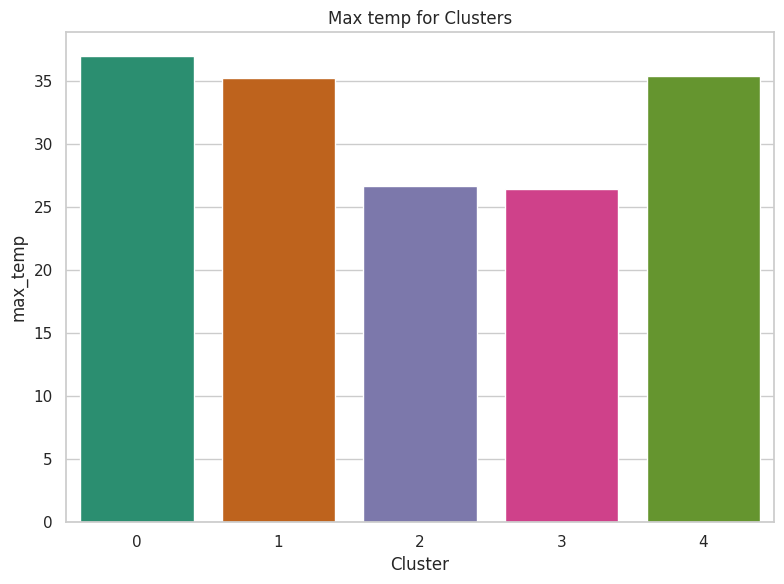

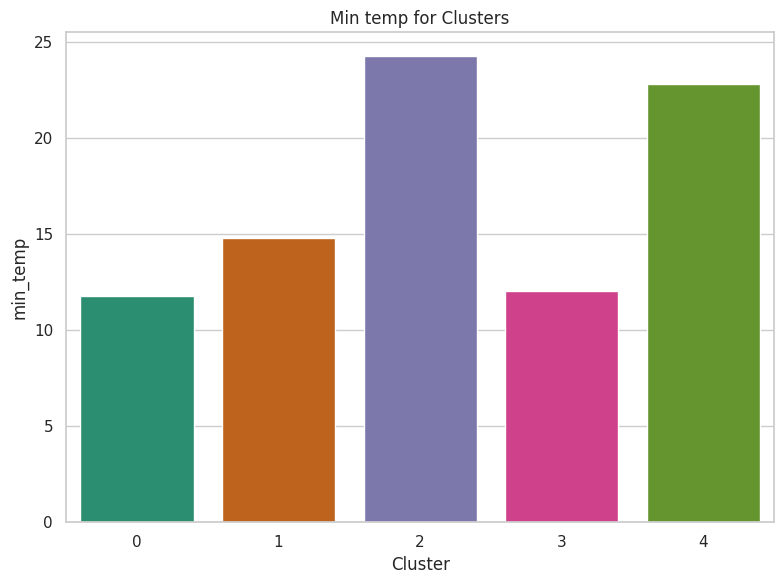

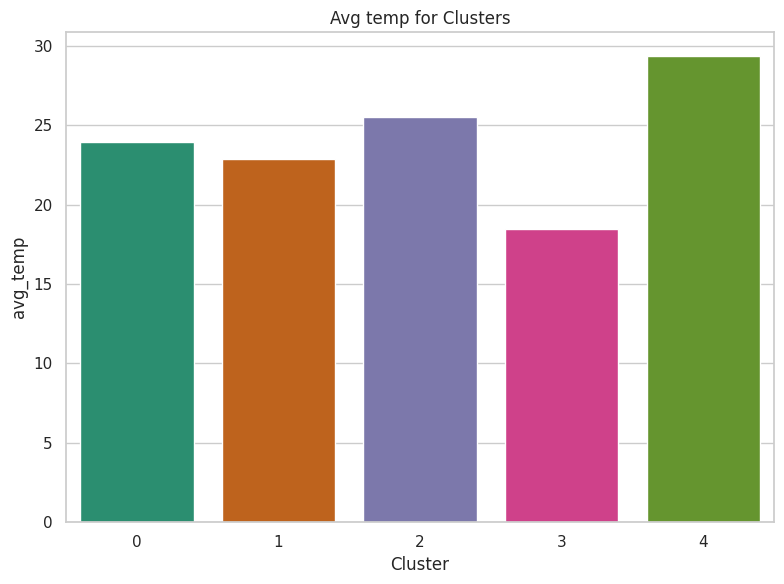

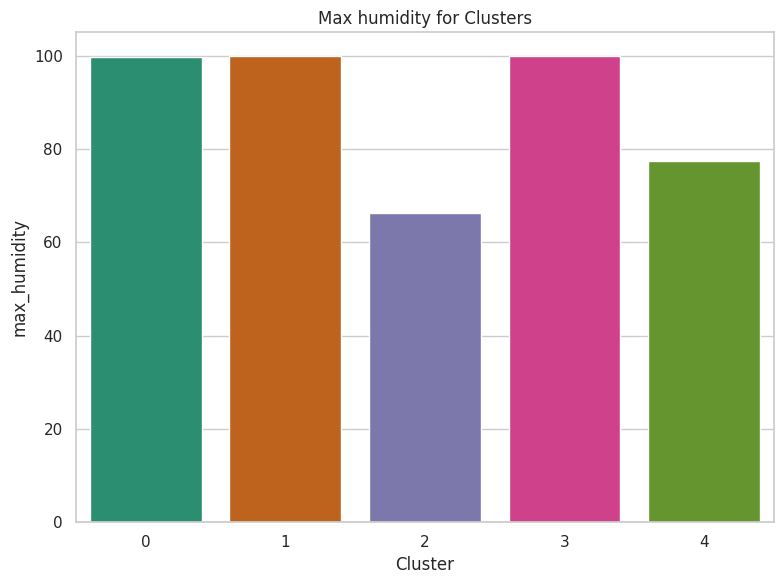

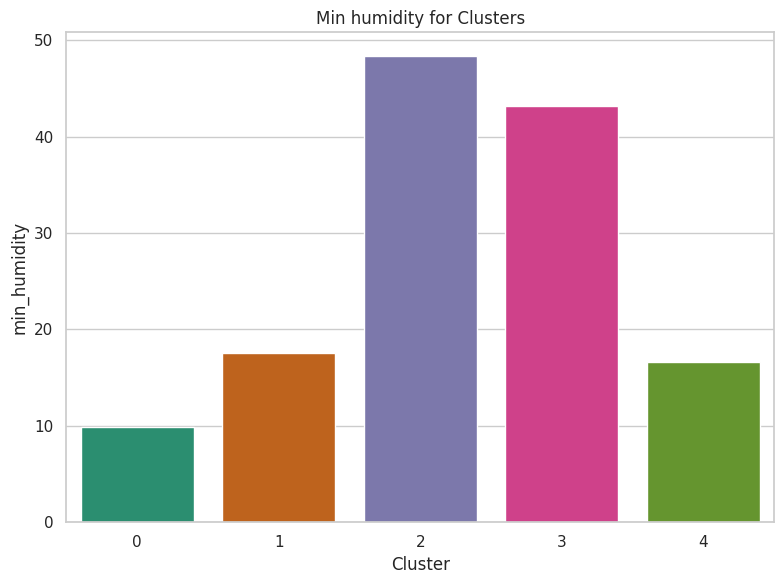

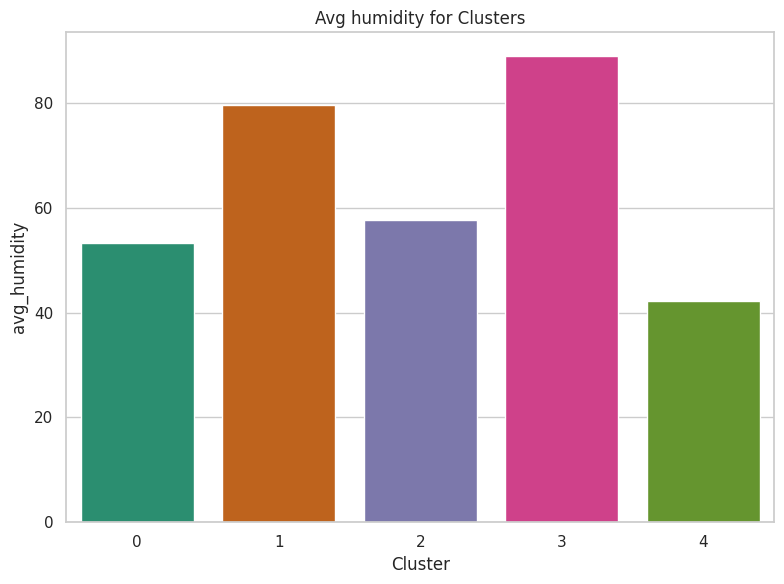

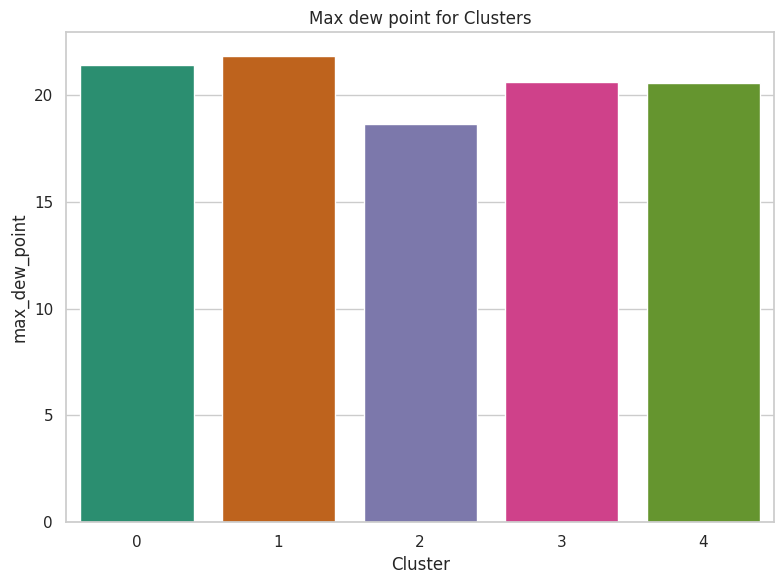

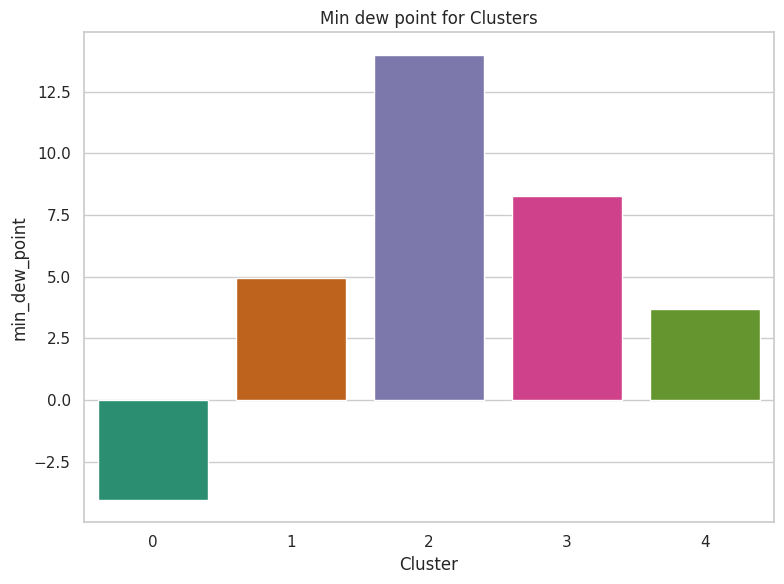

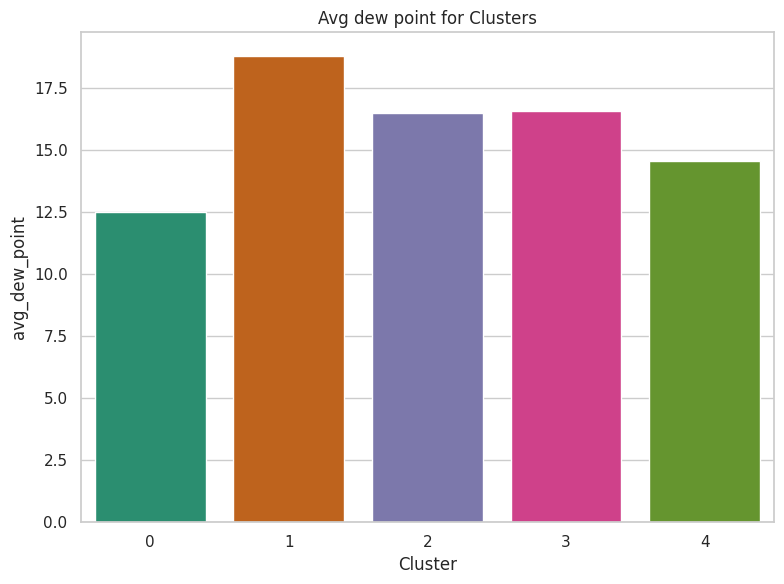

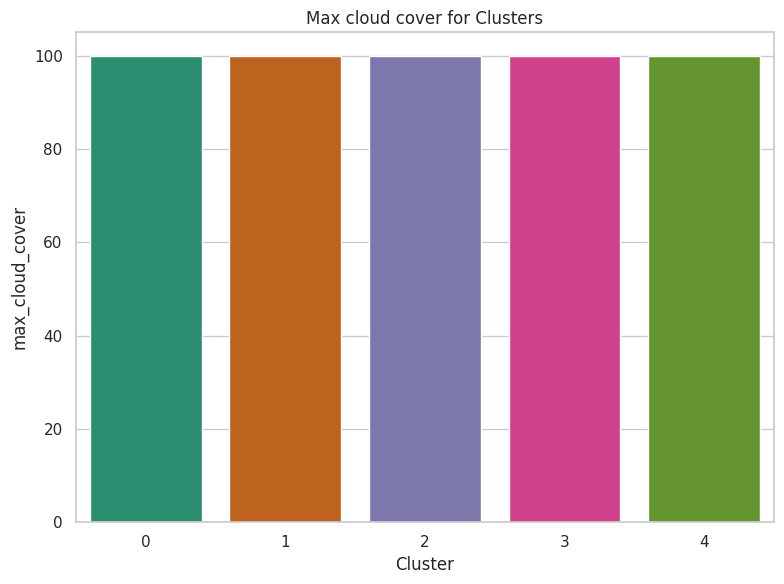

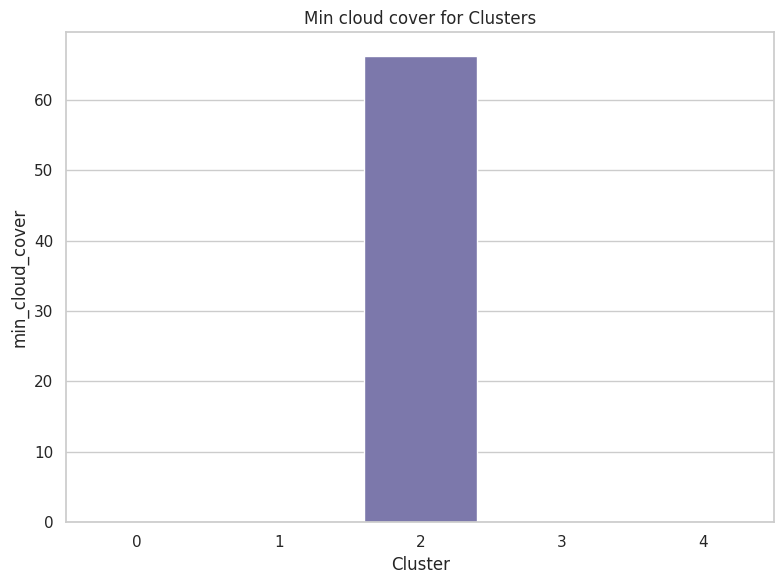

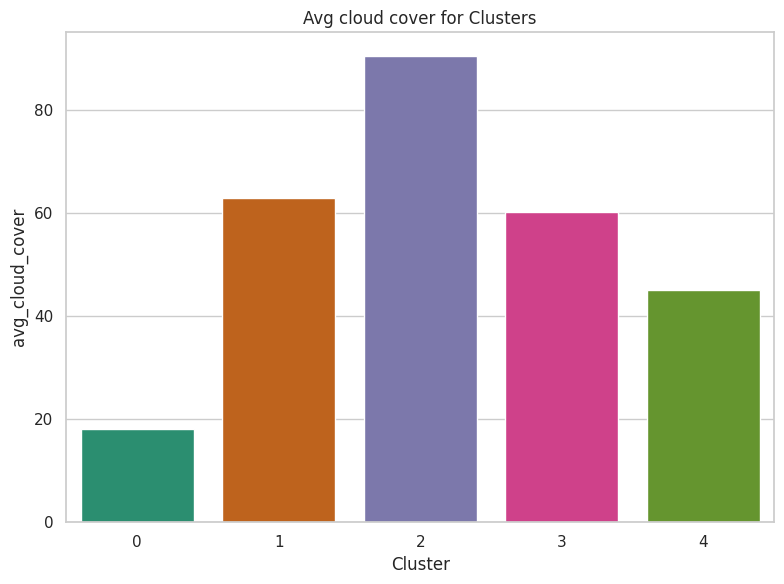

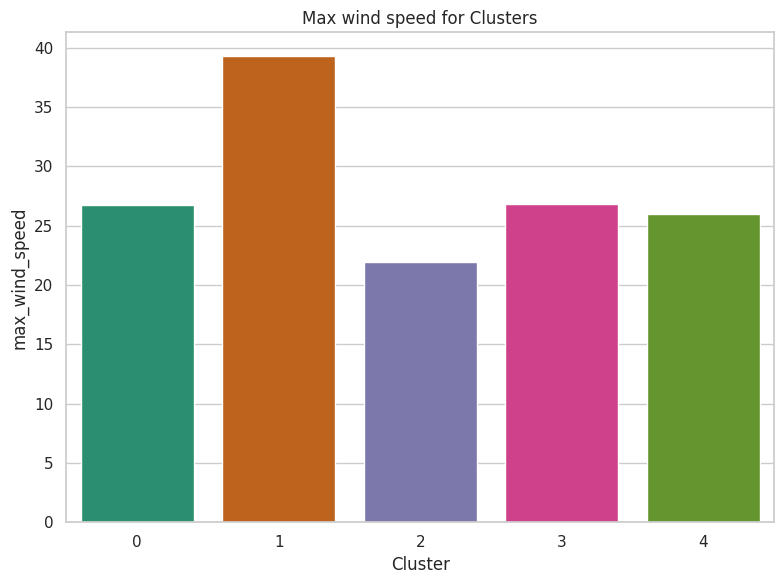

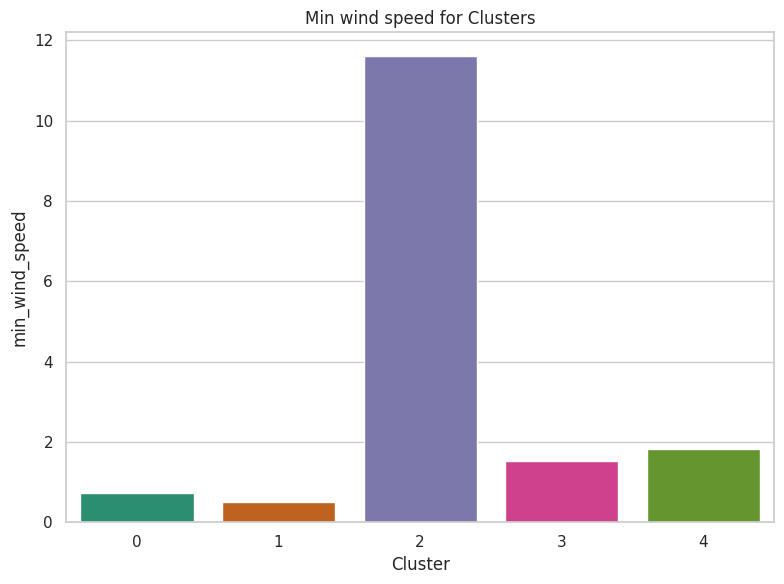

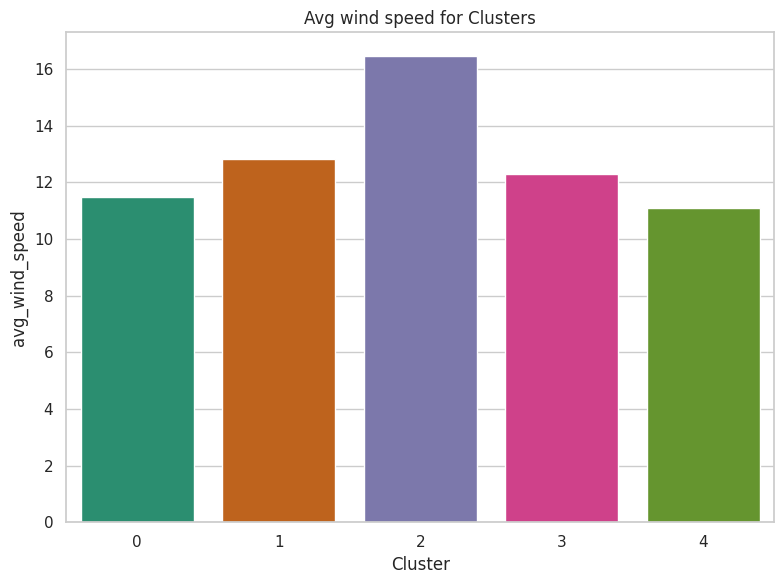

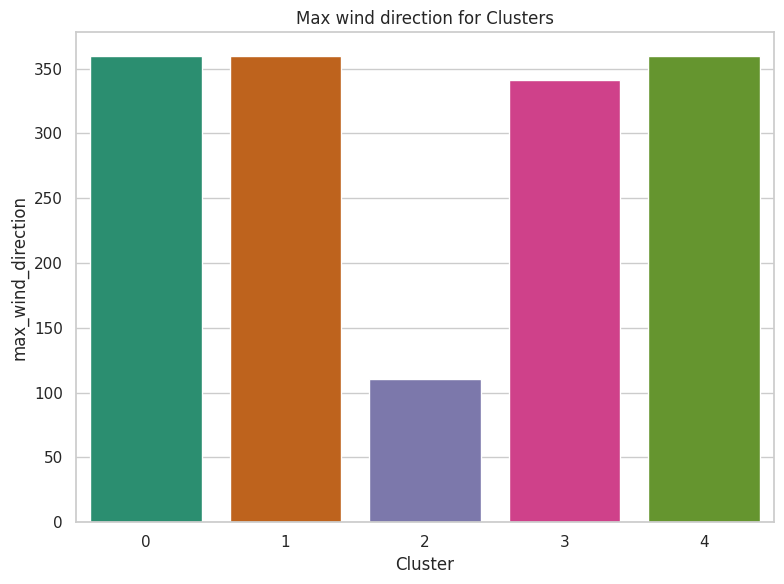

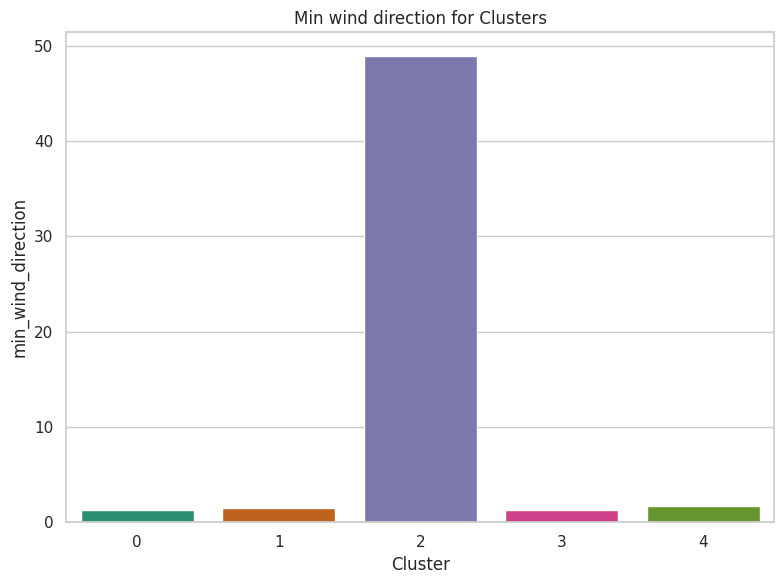

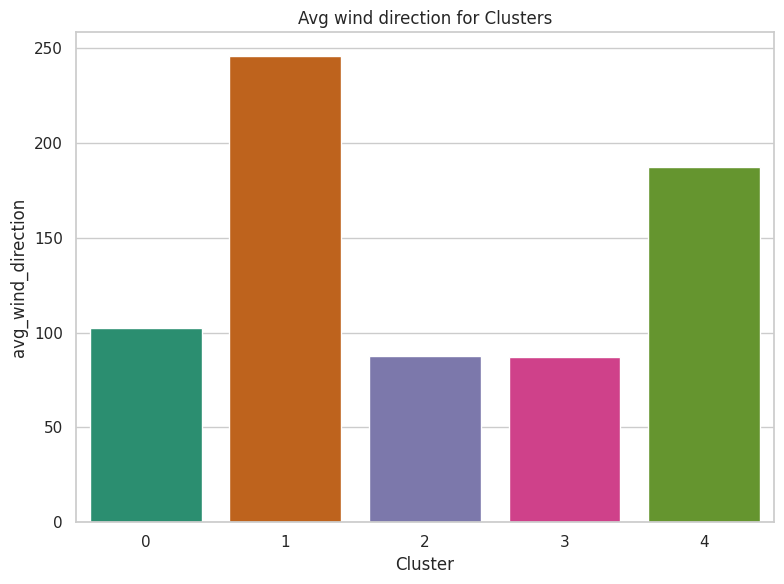

In [ ]:
sns.set(style="whitegrid")
stat_columns = ['max_temp', 'min_temp', 'avg_temp',
                'max_humidity', 'min_humidity', 'avg_humidity',
                'max_dew_point', 'min_dew_point', 'avg_dew_point',
                'max_cloud_cover', 'min_cloud_cover', 'avg_cloud_cover',
                'max_wind_speed', 'min_wind_speed', 'avg_wind_speed',
                'max_wind_direction', 'min_wind_direction', 'avg_wind_direction']

for stat in stat_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Cluster', y=stat, data=stats, palette="Dark2", hue='Cluster')
    plt.title(f'{stat.replace("_", " ").capitalize()} for Clusters')
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.show()

In [ ]:
month_counts = final_df.groupby(['month', 'Cluster']).size().reset_index(name='count')
print(month_counts)

    month  Cluster  count
0       1        0   1559
1       1        1     96
2       1        2      3
3       1        3    563
4       1        4     11
5       2        0   1606
6       2        1     30
7       2        3    181
8       2        4      7
9       3        0   1165
10      3        1    210
11      3        3     72
12      3        4     41
13      4        0   1011
14      4        1    362
15      4        3     12
16      4        4     55
17      5        0    185
18      5        1   1273
19      5        3      2
20      5        4     28
21      6        0      2
22      6        1   1437
23      6        4      1
24      7        0     14
25      7        1   1461
26      7        3     12
27      7        4      1
28      8        0     11
29      8        1   1466
30      8        3      5
31      8        4      6
32      9        0     13
33      9        1   1424
34      9        3      2
35      9        4      1
36     10        0    651
37     10   

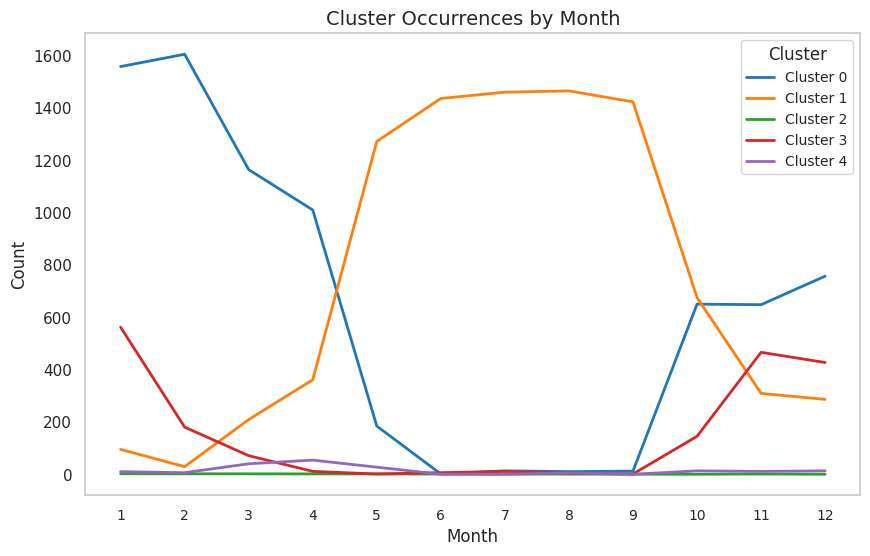

In [ ]:
colors = sns.color_palette("tab10", n_colors=month_counts['Cluster'].nunique())
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(month_counts['Cluster'].unique()):
    cluster_data = month_counts[month_counts['Cluster'] == cluster]
    plt.plot(cluster_data['month'], cluster_data['count'],
             label=f'Cluster {cluster}', color=colors[idx], linewidth=2)

plt.title('Cluster Occurrences by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.xticks(range(1, 13), fontsize=10)  # Ensure months are labeled 1-12
plt.grid(False)
plt.show()

#**Conclusion:**

**Cluster 0:**

Temperature Range: 11.80 – 37.00 °C

Average Temperature: 23.96 °C

Humidity Range: 9.93 – 99.69%

Average Humidity: 53.36%

Wind Speed Range: 0.72 – 26.76 m/s

Average Wind Speed: 11.49 m/s

Rainfall Range: 0.0 – 1.7 mm

Average Rainfall: 0.007 mm

Dew Point Range: -4.05 – 21.40 °C

Average Dew Point: 12.51 °C

Cloud Cover Range: 0.0 – 100.00%

Average Cloud Cover: 18.18%

Type: Mild, Dry, with Sparse Clouds


**Cluster 1:**

Temperature Range: 14.80 – 35.20 °C

Average Temperature: 22.90 °C

Humidity Range: 17.56 – 100.00%

Average Humidity: 79.70%

Wind Speed Range: 0.51 – 39.35 m/s

Average Wind Speed: 12.82 m/s

Rainfall Range: 0.0 – 12.8 mm

Average Rainfall: 0.209 mm

Dew Point Range: 4.95 – 21.85 °C

Average Dew Point: 18.80 °C

Cloud Cover Range: 0.0 – 100.00%

Average Cloud Cover: 62.89%

Type: Mild, Humid, A Little Cloudy with Frequent Rain


**Cluster 2:**

Temperature Range: 24.30 – 26.65 °C

Average Temperature: 25.50 °C

Humidity Range: 48.41 – 66.26%

Average Humidity: 57.74%

Wind Speed Range: 11.62 – 21.99 m/s

Average Wind Speed: 16.47 m/s

Rainfall Range: 0.0 – 0.3 mm

Average Rainfall: 0.071 mm

Dew Point Range: 14.00 – 18.65 °C

Average Dew Point: 16.47 °C

Cloud Cover Range: 66.3 – 100.00%

Average Cloud Cover: 90.59%

Type: Hot, Cloudy with No Significant Rain


**Cluster 3:**

Temperature Range: 12.05 – 26.40 °C

Average Temperature: 18.50 °C

Humidity Range: 43.22 – 100.00%

Average Humidity: 89.05%

Wind Speed Range: 1.53 – 26.83 m/s

Average Wind Speed: 12.28 m/s

Rainfall Range: 0.0 – 3.9 mm

Average Rainfall: 0.022 mm

Dew Point Range: 8.25 – 20.60 °C

Average Dew Point: 16.55 °C

Cloud Cover Range: 0.0 – 100.00%

Average Cloud Cover: 60.15%

Type: Colder, Humid, A Little Cloudy with Occasional Rain


**Cluster 4**:

Temperature Range: 22.80 – 35.40 °C

Average Temperature: 29.39 °C

Humidity Range: 16.66 – 77.45%

Average Humidity: 42.27%

Wind Speed Range: 1.84 – 25.96 m/s

Average Wind Speed: 11.10 m/s

Rainfall Range: 0.0 – 2.8 mm

Average Rainfall: 0.043 mm

Dew Point Range: 3.70 – 20.55 °C

Average Dew Point: 14.54 °C

Cloud Cover Range: 0.0 – 100.00%

Average Cloud Cover: 44.99%

Type: Very Hot, with Sparse Clouds and Less Frequent Rain

